<a href="https://colab.research.google.com/github/gargi510/Netflix_case_study/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unlocking the Streaming Secrets: A Data-Driven Analysis of **Netflix**'s Content Trends

Netflix, the world’s leading streaming platform, offers a vast library of movies, TV shows, documentaries, and more. As the streaming industry continues to evolve, Netflix has been at the forefront of shaping entertainment trends. However, with the massive influx of content, it becomes increasingly important for the platform to understand content preferences, trends, and areas of improvement to stay ahead in this competitive market.

Through this project, I have tried to analyze Netflix's content dataset to uncover key patterns related to release years, content types, ratings, and more. The goal is to extract valuable insights that can guide Netflix’s content strategy and help improve user engagement. By studying these trends, I aim to provide actionable recommendations for the platform to optimize its content acquisition, production, and marketing efforts.

#Problem Statement

With Netflix's vast and growing content library, it’s crucial to understand viewer preferences and content trends. This project analyzes Netflix's publicly available dataset to uncover patterns in content types, ratings, and release timings, providing actionable recommendations to optimize content strategy, improve engagement, and guide future acquisitions and productions.

#About Dataset

The dataset used for this analysis is the "Netflix Titles" dataset, available on Kaggle. It contains detailed information about Netflix’s content library, including movies and TV shows, along with metadata such as release year, ratings, genres, and more. The dataset is publicly shared by Netflix for analysis and research purposes.

##Metadata


- **Source**: [Kaggle: Netflix Movies and TV Shows Dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows)
- **Number of Rows**: 8807
- **Number of Columns**: 12

**Columns:**

1. **show_id**: Unique identifier for each show or movie.
2. **type**: Indicates whether the title is a "Movie" or "TV Show".
3. **title**: Name of the movie or TV show.
4. **director**: Director(s) of the movie or TV show (if available).
5. **cast**: List of main actors and actresses involved in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year the movie or TV show was originally released.
9. **rating**: Rating assigned to the movie or TV show (e.g., PG, PG-13, R).
10. **duration**: Duration of the movie in minutes or the number of seasons for TV shows.
11. **listed_in**: Genres or categories the title is listed under (e.g., Drama, Comedy, etc.).
12. **description**: A brief summary or description of the title.

**Missing Values**:
- Some columns, such as `director`, `cast`, and `country`, may contain missing values for certain entries.

**Data Limitations**:
- **Biases**: The dataset may reflect a higher proportion of content from specific regions or countries.
- **Updates**: The dataset does not reflect the most current content added to Netflix, as it was last updated at a specific point in time.
- **Inconsistent Data**: Some entries may contain incomplete or inconsistent data (e.g., missing release years or ratings).


# Analyzing and Cleaning dataset

## Reading the file and necessary imports

In [332]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset (update the file path accordingly)
file_path = "/content/drive/MyDrive/Colab Notebooks/projects/netflix_titles.csv"  # Update with your file path
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Understanding the Data Structure

In [254]:
# Display basic information about the dataset

print("\nDataset Preview:\n")
display(df.head())  # Show first 5 rows


Dataset Preview:



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [255]:
# Show column names
print("\nColumn Names:\n\n", df.columns.tolist())


Column Names:

 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [256]:
# Show data types and non-null counts

print("\nDataset Info:\n")
print(df.info())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [257]:
# Check for missing values

print("\nMissing Values:\n")
print(df.isnull().sum())



Missing Values:

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [258]:
# Summary statistics

print("\nBasic Statistics:")
print(df.describe(include='all'))



Basic Statistics:
       show_id   type   title       director                cast  \
count     8807   8807    8807           6173                7982   
unique    8807      2    8807           4528                7692   
top      s8807  Movie  Zubaan  Rajiv Chilaka  David Attenborough   
freq         1   6131       1             19                  19   
mean       NaN    NaN     NaN            NaN                 NaN   
std        NaN    NaN     NaN            NaN                 NaN   
min        NaN    NaN     NaN            NaN                 NaN   
25%        NaN    NaN     NaN            NaN                 NaN   
50%        NaN    NaN     NaN            NaN                 NaN   
75%        NaN    NaN     NaN            NaN                 NaN   
max        NaN    NaN     NaN            NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7976             8797   8807.000000   8803      8804   
unique            

In [259]:
# Checking the number of unique values in each column
print("\nUnique Values Count:")
print(df.nunique())



Unique Values Count:
show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64


## 📝 Initial Observations from Dataset Summary

- The dataset contains **8,807 rows**, with the index ranging from **0 to 8,806**.
- It includes **12 columns**:
  - Only `release_year` has an **integer** data type.
  - All other columns have the **object** data type.
- The following columns have **missing values** that need to be handled:
  - `director`, `cast`, `country`, `date_added`, `rating`, and `duration`.
- There are only two content types:
  - 🎬 **Movies**: 6,131 records (~70%)
  - 📺 **TV Shows**: 2,676 records (~30%)
- Only the columns **`show_id`** and **`title`** have **unique values** across all rows.
- 🎥 **Director Rajiv Chilaka** appears **19 times**, and **David Attenborough** is the most frequent name in the cast column, also appearing **19 times**.
- Each title may have **multiple cast members**, separated by commas — this will require **preprocessing**.
- We need to check for **duplicate titles with different directors** and resolve them if found.
- 📍 **United States** is the most frequently listed country, appearing in **2,818 records** (~35%).
- 🗓️ A total of **109 titles** were added to Netflix on **January 1, 2020**.
- 🎞️ The **release years** of titles range from **1925 to 2021**.
- 🔞 The most common content rating is **TV-MA**, associated with **3,207 titles**.
- ⏱️ The value **'1 Season'** appears **1,793 times** in the `duration` column — this reflects season count, not duration, and needs separate handling.
- 🏷️ There are **514 unique genre tags** in the `listed_in` column.
  - The most frequent genres include **"Dramas"** and **"International Movies"**.
- 🧾 One **description** appears **4 times**, which seems unusual and requires investigation.

---


## Data Cleaning

### Unnesting Director, cast, listed_in and country columns

In [260]:
# Split the string columns into lists
df['cast'] = df['cast'].astype(str).str.split(', ')
df['listed_in'] = df['listed_in'].astype(str).str.split(', ')
df['director'] = df['director'].astype(str).str.split(', ')
df['country'] = df['country'].astype(str).str.split(', ')

# Explode each column to create a row for each item
df = df.explode('director')
df = df.explode('cast')
df = df.explode('country')
df = df.explode('listed_in')

#Rename 'listed_in' to 'genre' for clarity
df.rename(columns={'listed_in': 'genre'}, inplace=True)
df.rename(columns={'cast': 'actor'}, inplace=True)
df.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [261]:
df.country.value_counts()

,count
country,
United States,59349
India,22814
United Kingdom,12945
nan,11897
Japan,8679
...,...
Botswana,2
"United States,",1
Nicaragua,1


###Cleaning country and other categorial columns

In [262]:
df['actor'] = df['actor'].str.strip()
df['genre'] = df['genre'].str.strip()
df['director'] = df['director'].str.strip()
df['country'] = df['country'].str.strip()
df['country'] = df['country'].str.strip().str.replace(',', '', regex=False)

###Dropping duplicate records

In [263]:
df['duplicated'] = df.duplicated()
duplicated_rows = df.loc[df['duplicated'] == True]
df.drop(index=duplicated_rows.index, columns='duplicated', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201825 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201825 non-null  object
 1   type          201825 non-null  object
 2   title         201825 non-null  object
 3   director      201825 non-null  object
 4   actor         201825 non-null  object
 5   country       201825 non-null  object
 6   date_added    201667 non-null  object
 7   release_year  201825 non-null  int64 
 8   rating        201758 non-null  object
 9   duration      201822 non-null  object
 10  genre         201825 non-null  object
 11  description   201825 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


## Handling nulls

In [264]:
#checking nulls
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
actor,0
country,0
date_added,158
release_year,0
rating,67
duration,3


### Handling Duration and Rating Column Issues

In [265]:
df['duration'].head()

,duration
0,90 min
1,2 Seasons
1,2 Seasons
1,2 Seasons
1,2 Seasons


In [266]:
#check duration and title column
df[df['duration'].isnull()]

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...



- Some rows have missing values in the `duration` column, while the `rating` column incorrectly contains values like `'90 min'` that belong in `duration`. These values are identified and marked as `'NR'` in the `rating` column.

- All remaining `null` values in the `rating` column are also replaced with `'NR'` to maintain consistency.

- This cleanup ensures the `rating` column only contains valid rating values, and misclassified duration data does not pollute it.

In [267]:
## Handling Duration

# Step 1: Copy 'rating' values to 'duration' where 'duration' is NaN, but avoid overwriting if 'rating' is also NaN
df.loc[df['duration'].isna() & df['rating'].notna(), 'duration'] = df.loc[df['duration'].isna() & df['rating'].notna(), 'rating']


In [268]:
## Handling Rating

# Step 1: Identify rows where the 'rating' column contains values that are in the 'duration' column
df.loc[df['rating'].str.contains('min', na=False), 'rating'] = 'NR'

# Step 2: Convert all Na values to NR
df['rating'].fillna('NR', inplace=True)

# Display rating column
df['rating'].value_counts()


,count
rating,
TV-MA,73771
TV-14,43871
R,25850
PG-13,16246
TV-PG,14926
PG,10919
TV-Y7,6304
TV-Y,3665
TV-G,2779


In [269]:
#checking nulls
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
actor,0
country,0
date_added,158
release_year,0
rating,0
duration,0


In [270]:
#observe nulls in date_added column
df[df['date_added'].isnull()]


,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,nan,Daniel Radcliffe,United Kingdom,NaN,2013,TV-MA,2 Seasons,British TV Shows,"Set during the Russian Revolution, this comic ..."
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,nan,Daniel Radcliffe,United Kingdom,NaN,2013,TV-MA,2 Seasons,TV Comedies,"Set during the Russian Revolution, this comic ..."
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,nan,Daniel Radcliffe,United Kingdom,NaN,2013,TV-MA,2 Seasons,TV Dramas,"Set during the Russian Revolution, this comic ..."
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,nan,Jon Hamm,United Kingdom,NaN,2013,TV-MA,2 Seasons,British TV Shows,"Set during the Russian Revolution, this comic ..."
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,nan,Jon Hamm,United Kingdom,NaN,2013,TV-MA,2 Seasons,TV Comedies,"Set during the Russian Revolution, this comic ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8182,s8183,TV Show,The Adventures of Figaro Pho,nan,Charlotte Hamlyn,Australia,NaN,2015,TV-Y7,2 Seasons,TV Comedies,"Imagine your worst fears, then multiply them: ..."
8182,s8183,TV Show,The Adventures of Figaro Pho,nan,Stavroula Mountzouris,Australia,NaN,2015,TV-Y7,2 Seasons,Kids' TV,"Imagine your worst fears, then multiply them: ..."
8182,s8183,TV Show,The Adventures of Figaro Pho,nan,Stavroula Mountzouris,Australia,NaN,2015,TV-Y7,2 Seasons,TV Comedies,"Imagine your worst fears, then multiply them: ..."
8182,s8183,TV Show,The Adventures of Figaro Pho,nan,Aletheia Burney,Australia,NaN,2015,TV-Y7,2 Seasons,Kids' TV,"Imagine your worst fears, then multiply them: ..."


In [271]:
# Impute 'date_added' based on the mode (most frequent value) of the 'date_added' for the same release_year
for i in df[df['date_added'].isnull()]['release_year'].unique():
    # Get the mode of 'date_added' for the given 'release_year'
    imp = df[df['release_year'] == i]['date_added'].mode().values[0]

    # Impute the missing 'date_added' with the corresponding mode for that release year
    df.loc[df['release_year'] == i, 'date_added'] = df.loc[df['release_year'] == i, 'date_added'].fillna(imp)

# Display the DataFrame after imputation
df.head()


,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


##Imputating Null values with No Actor/No Director/No Country

In [272]:
df.reset_index(drop=True, inplace=True)

# Replace 'nan' strings with actual NaN values in 'actor', 'director', and 'country'
df['actor'] = df['actor'].replace('nan', np.nan)
df['director'] = df['director'].replace('nan', np.nan)
df['country'] = df['country'].replace('nan', np.nan)

# Fill any remaining NaN values in 'actor', 'director', and 'country' with 'Unknown'
df['actor'].fillna('Unknown Actor', inplace=True)
df['director'].fillna('Unknown Director', inplace=True)
df['country'].fillna('Unknown Country', inplace=True)



### Final Dataset Overview

In [273]:
df.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201825 entries, 0 to 201824
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201825 non-null  object
 1   type          201825 non-null  object
 2   title         201825 non-null  object
 3   director      201825 non-null  object
 4   actor         201825 non-null  object
 5   country       201825 non-null  object
 6   date_added    201825 non-null  object
 7   release_year  201825 non-null  int64 
 8   rating        201825 non-null  object
 9   duration      201825 non-null  object
 10  genre         201825 non-null  object
 11  description   201825 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


In [275]:
# Check formissing values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
actor,0
country,0
date_added,0
release_year,0
rating,0
duration,0


- The dataset contains **201,825 records**.
- There are **12 columns**.
- The data types of the columns:
  - **`release_dt`**: `int`


In [334]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#Exploratory Data analysis

###Spliting the data based on type

      type  title count
0    Movie         6128
1  TV Show         2676


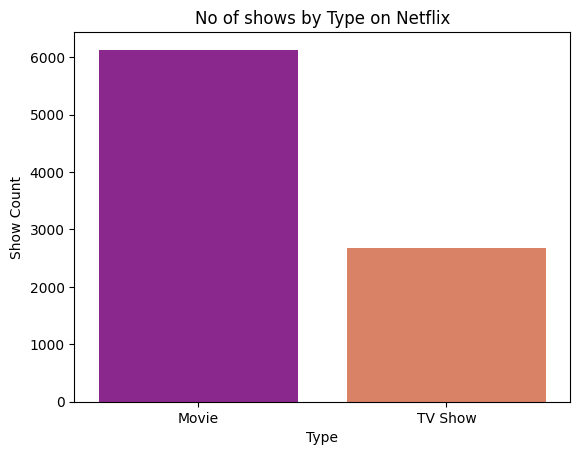

In [313]:
count_df=df.groupby('type')['title'].nunique().reset_index(name = 'title count')
print(count_df)
sns.barplot(data = count_df, x = 'type', y= 'title count', palette='plasma')
plt.title('No of shows by Type on Netflix')
plt.xlabel('Type')
plt.ylabel('Show Count')
plt.show()

###Titles for each type for each country

In [277]:
# Filter for Movies
movies = df[df['type'] == 'Movie']
# Filter for TV Shows
tv_shows = df[df['type'] == 'TV Show']

🎬 Top 10 Country with Movies:
             country   type  title_count
111    United States  Movie         2750
42             India  Movie          962
110   United Kingdom  Movie          534
112  Unknown Country  Movie          440
19            Canada  Movie          319
33            France  Movie          302
35           Germany  Movie          182
98             Spain  Movie          171
50             Japan  Movie          119
22             China  Movie          114

📺 Top 10 Country for TV Shows:
            country     type  title_count
63    United States  TV Show          938
64  Unknown Country  TV Show          391
62   United Kingdom  TV Show          272
30            Japan  TV Show          199
52      South Korea  TV Show          170
8            Canada  TV Show          126
19           France  TV Show           90
25            India  TV Show           84
57           Taiwan  TV Show           70
2         Australia  TV Show           66


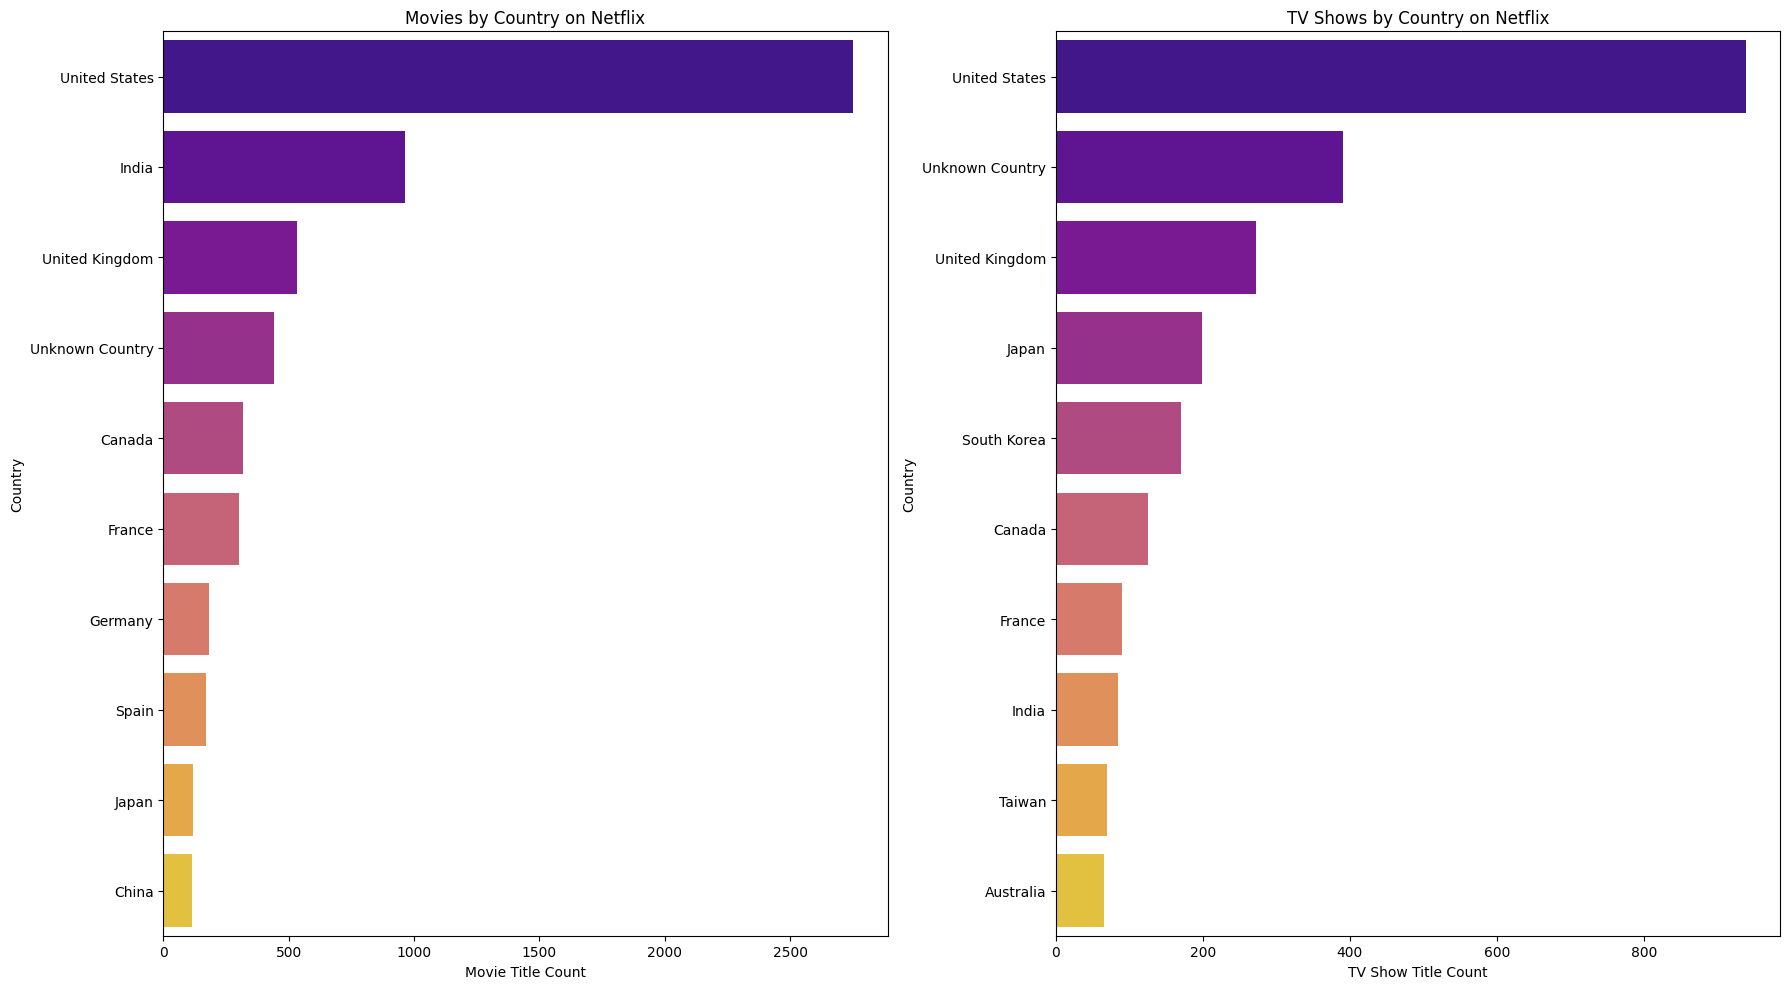

In [314]:
# Grouping data by country and type, and counting the unique titles for Movies
movie_counts_per_country = movies.groupby(['country', 'type'])['title'].nunique().reset_index(name='title_count') \
    .sort_values(by='title_count', ascending=False).head(10)

# Grouping data by country and type, and counting the unique titles for TV Shows
tvshow_counts_per_country = tv_shows.groupby(['country', 'type'])['title'].nunique().reset_index(name='title_count') \
    .sort_values(by='title_count', ascending=False).head(10)

# Print Movie counts per country - Shows top 10 countries with the most movies
print("🎬 Top 10 Country with Movies:")
print(movie_counts_per_country)

# Print TV Show counts per country - Shows top 10 countries with the most TV shows
print("\n📺 Top 10 Country for TV Shows:")
print(tvshow_counts_per_country)

# Creating subplots to visualize the data
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Plotting the movie title counts by country
sns.barplot(x='title_count', y='country', data=movie_counts_per_country, ax=axes[0], palette='plasma')
axes[0].set_xlabel('Movie Title Count')  # Label for X-axis
axes[0].set_ylabel('Country')           # Label for Y-axis
axes[0].set_title('Movies by Country on Netflix')  # Title of the plot

# Plotting the TV show title counts by country
sns.barplot(x='title_count', y='country', data=tvshow_counts_per_country, ax=axes[1], palette='plasma')
axes[1].set_xlabel('TV Show Title Count')  # Label for X-axis
axes[1].set_ylabel('Country')              # Label for Y-axis
axes[1].set_title('TV Shows by Country on Netflix')  # Title of the plot

# Adjust layout to ensure the plots are not overlapping
plt.tight_layout()

# Show the final plots
plt.show()


### Movies based on genre

🎬 Top 5 Genre in Movies:
                   genre   type  show_count
11  International Movies  Movie        2750
7                 Dramas  Movie        2425
4               Comedies  Movie        1674
6          Documentaries  Movie         869
0     Action & Adventure  Movie         859

📺 Top 5 Genre in TV Show:
                     genre     type  show_count
5   International TV Shows  TV Show        1351
15               TV Dramas  TV Show         763
14             TV Comedies  TV Show         581
3           Crime TV Shows  TV Show         470
6                 Kids' TV  TV Show         451


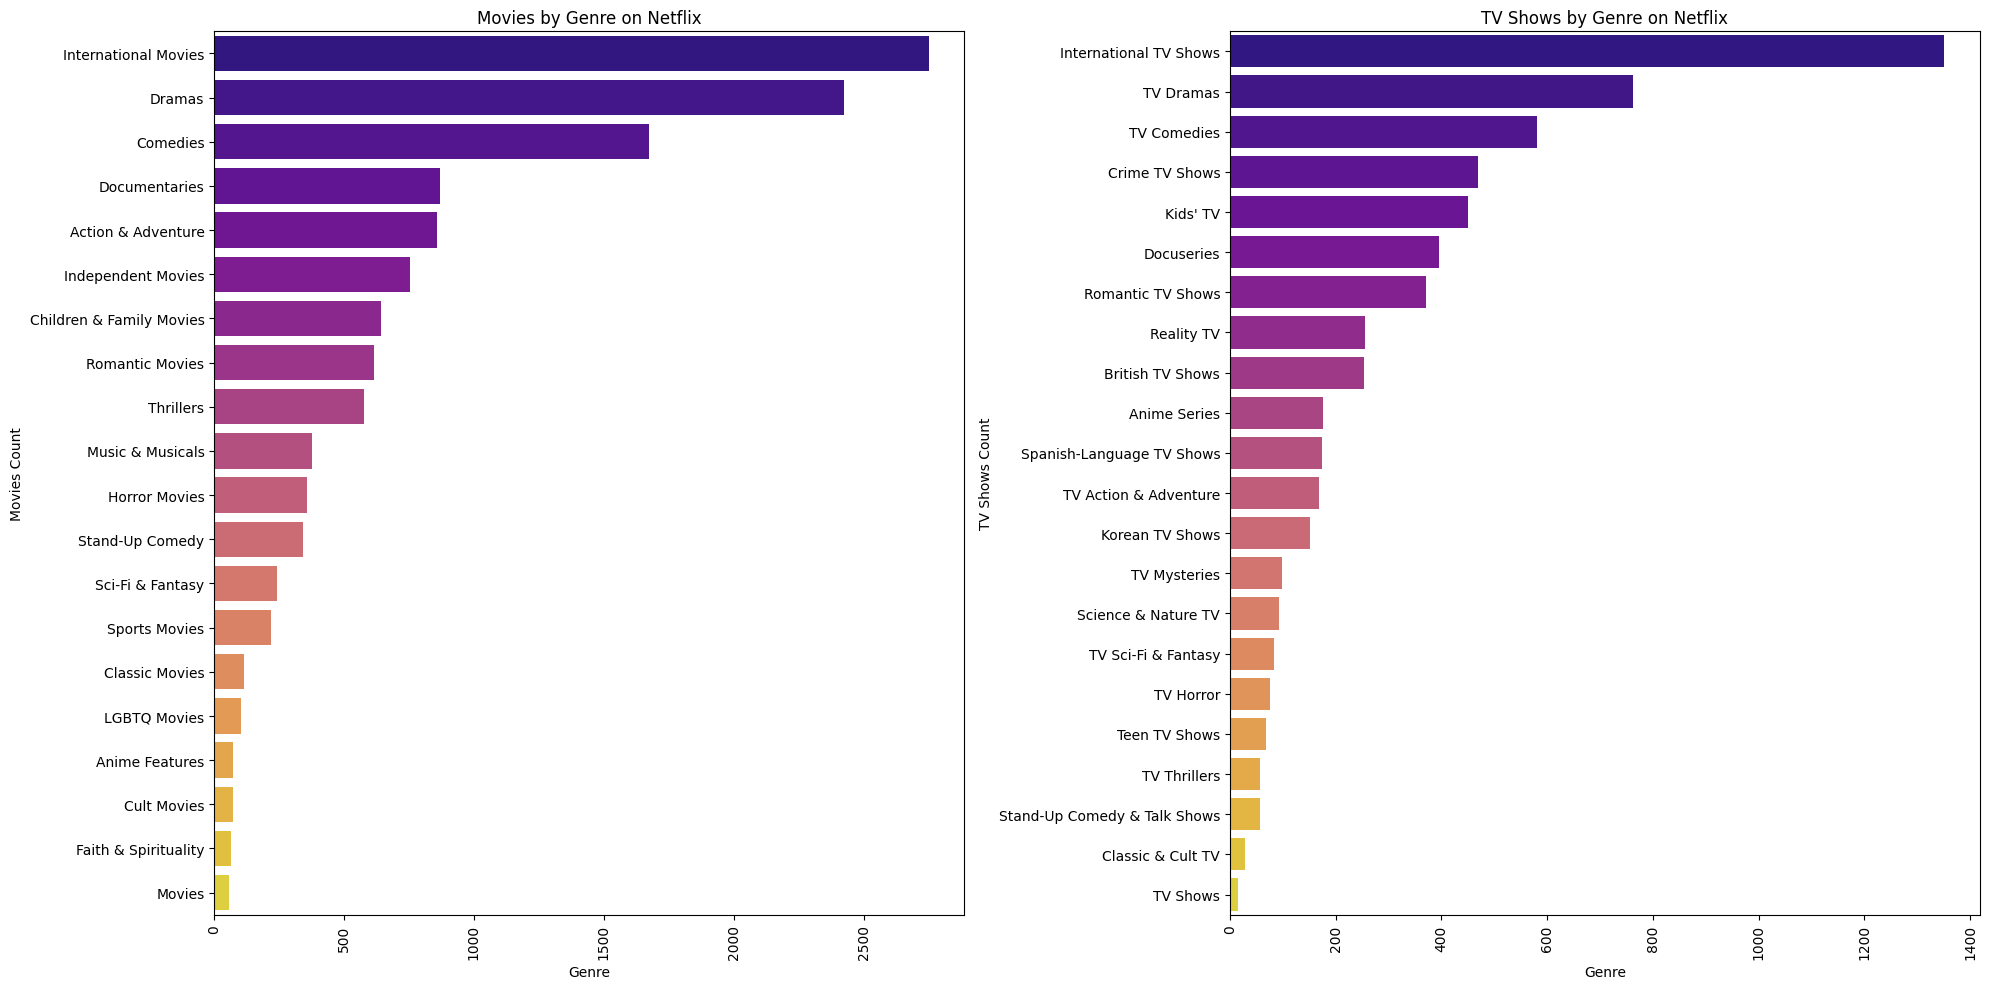

In [284]:
# Grouping data for Movies by 'genre' and 'type' to get the unique count of titles
movie_counts_per_genre = movies.groupby(['genre', 'type'])['title'].nunique().reset_index(name='show_count').sort_values(by='show_count', ascending=False)
print("🎬 Top 5 Genre in Movies:")
print(movie_counts_per_genre.head())

# Grouping data for TV Shows by 'genre' and 'type' to get the unique count of titles
tvshows_counts_per_genre = tv_shows.groupby(['genre', 'type'])['title'].nunique().reset_index(name='show_count').sort_values(by='show_count', ascending=False)
print("\n📺 Top 5 Genre in TV Show:")
print(tvshows_counts_per_genre.head())

# Create subplots to display both bar charts in one row
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Movie plot: Plotting the count of movies by genre
sns.barplot(y='genre', x='show_count', data=movie_counts_per_genre, ax=axes[0], palette='plasma')
axes[0].set_title('Movies by Genre on Netflix')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Movies Count')
axes[0].tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for better readability

# TV Show plot: Plotting the count of TV shows by genre
sns.barplot(y='genre', x='show_count', data=tvshows_counts_per_genre, ax=axes[1], palette='plasma')
axes[1].set_title('TV Shows by Genre on Netflix')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('TV Shows Count')
axes[1].tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for better readability

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()


###Titles for each type based on release year


🎬 Top 10 Release Year for Movies:
   release_year   type  show_count
0          1942  Movie           2
1          1943  Movie           3
2          1944  Movie           3
3          1945  Movie           3
4          1946  Movie           1

📺 Top 10 Release Year for TV Shows:
   release_year     type  show_count
0          1925  TV Show           1
1          1945  TV Show           1
2          1946  TV Show           1
3          1963  TV Show           1
4          1967  TV Show           1


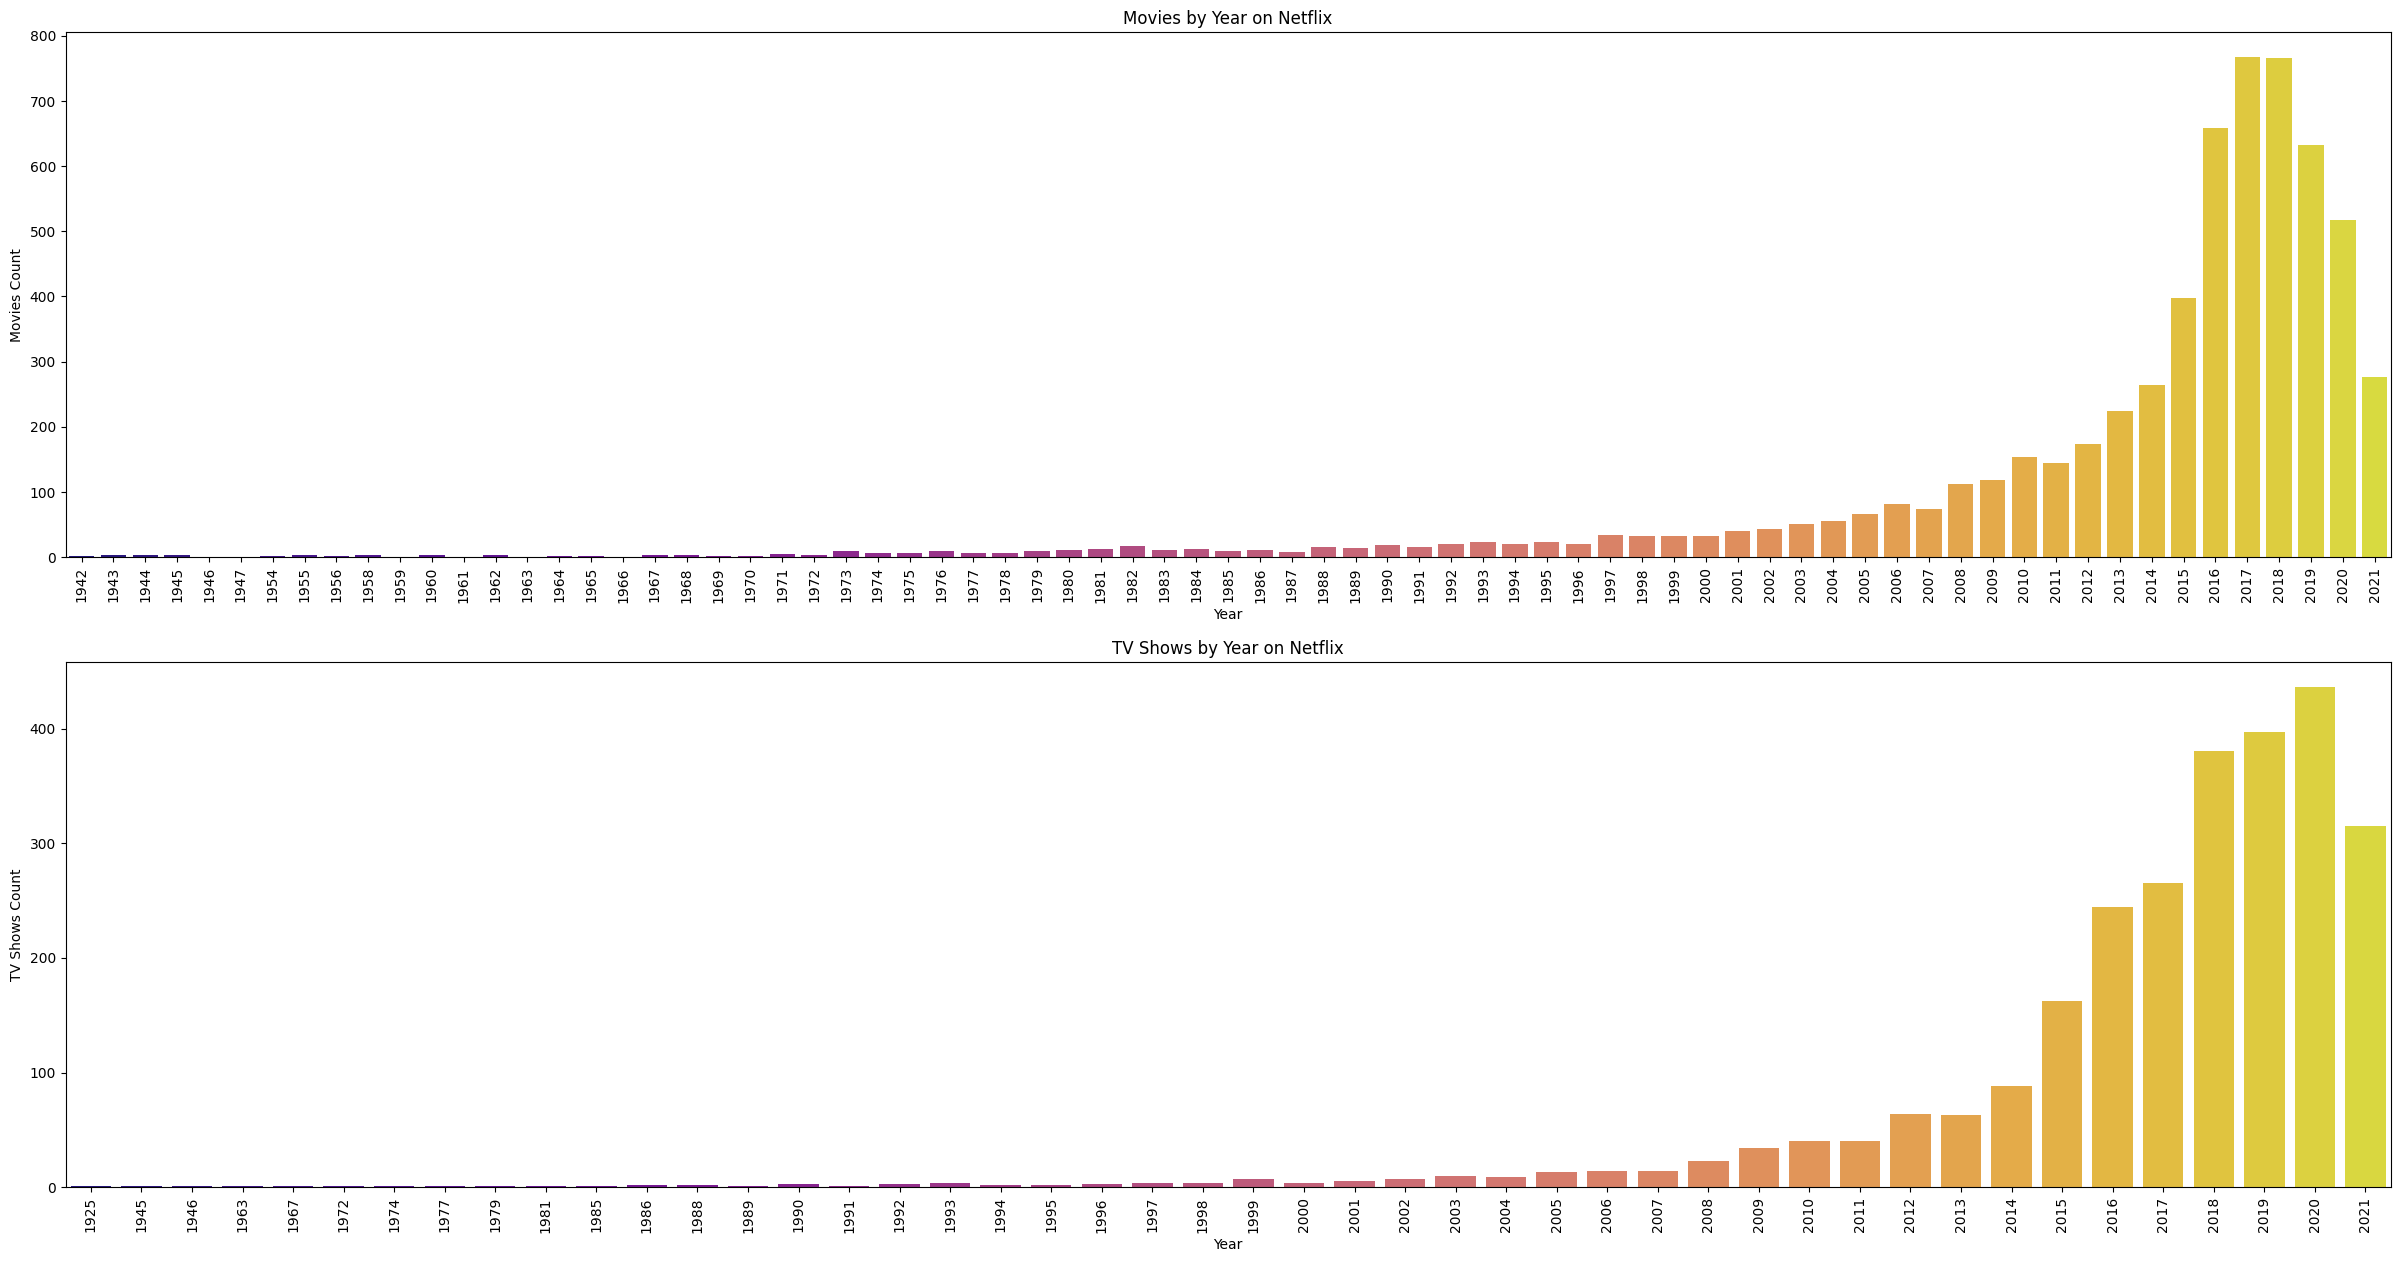

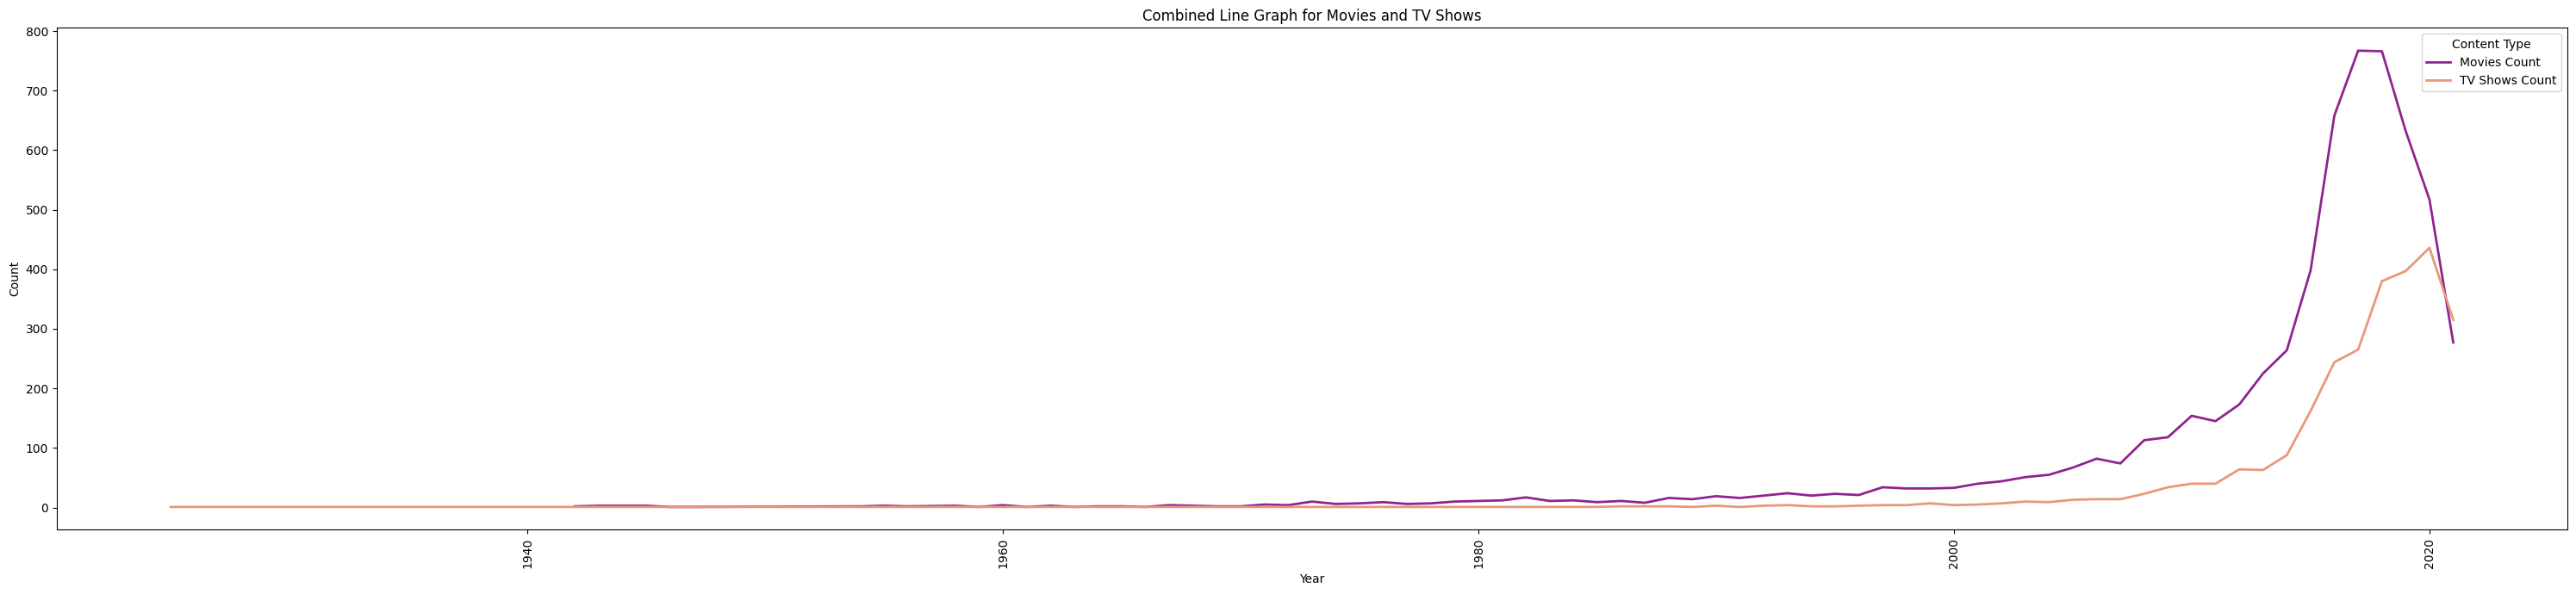

In [319]:
# Grouping data for Movies by 'release_year' and 'type' to get the unique count of titles
movie_counts_per_year = movies.groupby(['release_year', 'type'])['title'].nunique().reset_index(name='show_count').sort_values(by='release_year', ascending=True)

# Grouping data for TV Shows by 'release_year' and 'type' to get the unique count of titles
tvshows_counts_per_year = tv_shows.groupby(['release_year', 'type'])['title'].nunique().reset_index(name='show_count').sort_values(by='release_year', ascending=True)

# Display tables for Movie counts and TV show counts
print("\n🎬 Top 10 Release Year for Movies:")
print(movie_counts_per_year.head())

print("\n📺 Top 10 Release Year for TV Shows:")
print(tvshows_counts_per_year.head())

# Create subplots to display both bar charts in the first row and a combined line graph in the second row (spanning both columns)
fig, axes = plt.subplots(2, 1, figsize=(30, 15))

# Movie plot: Plotting the count of movies released by year
sns.barplot(x='release_year', y='show_count', data=movie_counts_per_year, ax=axes[0], palette="plasma")
axes[0].set_title('Movies by Year on Netflix')  # Set the title of the plot
axes[0].set_xlabel('Year')  # Set label for the x-axis
axes[0].set_ylabel('Movies Count')  # Set label for the y-axis
axes[0].tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for better readability

# TV Show plot: Plotting the count of TV shows released by year
sns.barplot(x='release_year', y='show_count', data=tvshows_counts_per_year, ax=axes[1], palette="plasma")
axes[1].set_title('TV Shows by Year on Netflix')  # Set the title of the plot
axes[1].set_xlabel('Year')  # Set label for the x-axis
axes[1].set_ylabel('TV Shows Count')  # Set label for the y-axis
axes[1].tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for better readability

# Combined Line Plot: Movie and TV Shows over years
# Movie and TV Show counts over the years for line graph
movie_counts_per_year_sorted = movie_counts_per_year.groupby('release_year')['show_count'].sum().reset_index()
tvshows_counts_per_year_sorted = tvshows_counts_per_year.groupby('release_year')['show_count'].sum().reset_index()

# Create a new figure with one axis spanning the entire second row
fig2, ax2 = plt.subplots(figsize=(30, 7))

# Plot the line graph for Movies and TV Shows
sns.lineplot(data=movie_counts_per_year_sorted, x='release_year', y='show_count', ax=ax2, label='Movies Count', color='#8E248E', lw=2)
sns.lineplot(data=tvshows_counts_per_year_sorted, x='release_year', y='show_count', ax=ax2, label='TV Shows Count', color='#E9967A', lw=2)

ax2.set_title('Combined Line Graph for Movies and TV Shows')  # Title of the graph
ax2.set_xlabel('Year')  # Label for the x-axis
ax2.set_ylabel('Count')  # Label for the y-axis
ax2.tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for better readability
ax2.legend(title='Content Type')

# Display the plots
plt.tight_layout()

# Show the figures
plt.show()


Movies were released the most in the year ‘2017’ & ‘2018’ respectively having 767 as the total number of movies
released whereas TV Shows were relased the most in the year ‘2020’ hitting 436 in total releases.


### Best time to launch movie weekwise and monthwise

In [285]:
# Based on release week
df_copy = df.copy()

# Convert 'date_added' to datetime
df_copy['date_added'] = pd.to_datetime(df_copy['date_added'], errors='coerce')

# Extract ISO calendar week, month, and year
df_copy['added_week'] = df_copy['date_added'].dt.isocalendar().week
df_copy['added_month'] = df_copy['date_added'].dt.month
df_copy['added_year'] = df_copy['date_added'].dt.year

#Creating data fromes for movie and TV show from this copy data frame
movies_copy=df_copy[df_copy['type'] == 'Movie']
tv_shows_copy=df_copy[df_copy['type'] == 'TV Show']

🎬 Top 5 weeks when Movies were added
    added_week  Movies added
0            1           316
43          44           243
39          40           214
8            9           207
25          26           195

📺 Top 5 weeks when TV Shows were Added
    added_week  TV Shows added
26          27              86
30          31              80
34          35              75
23          24              75
12          13              73


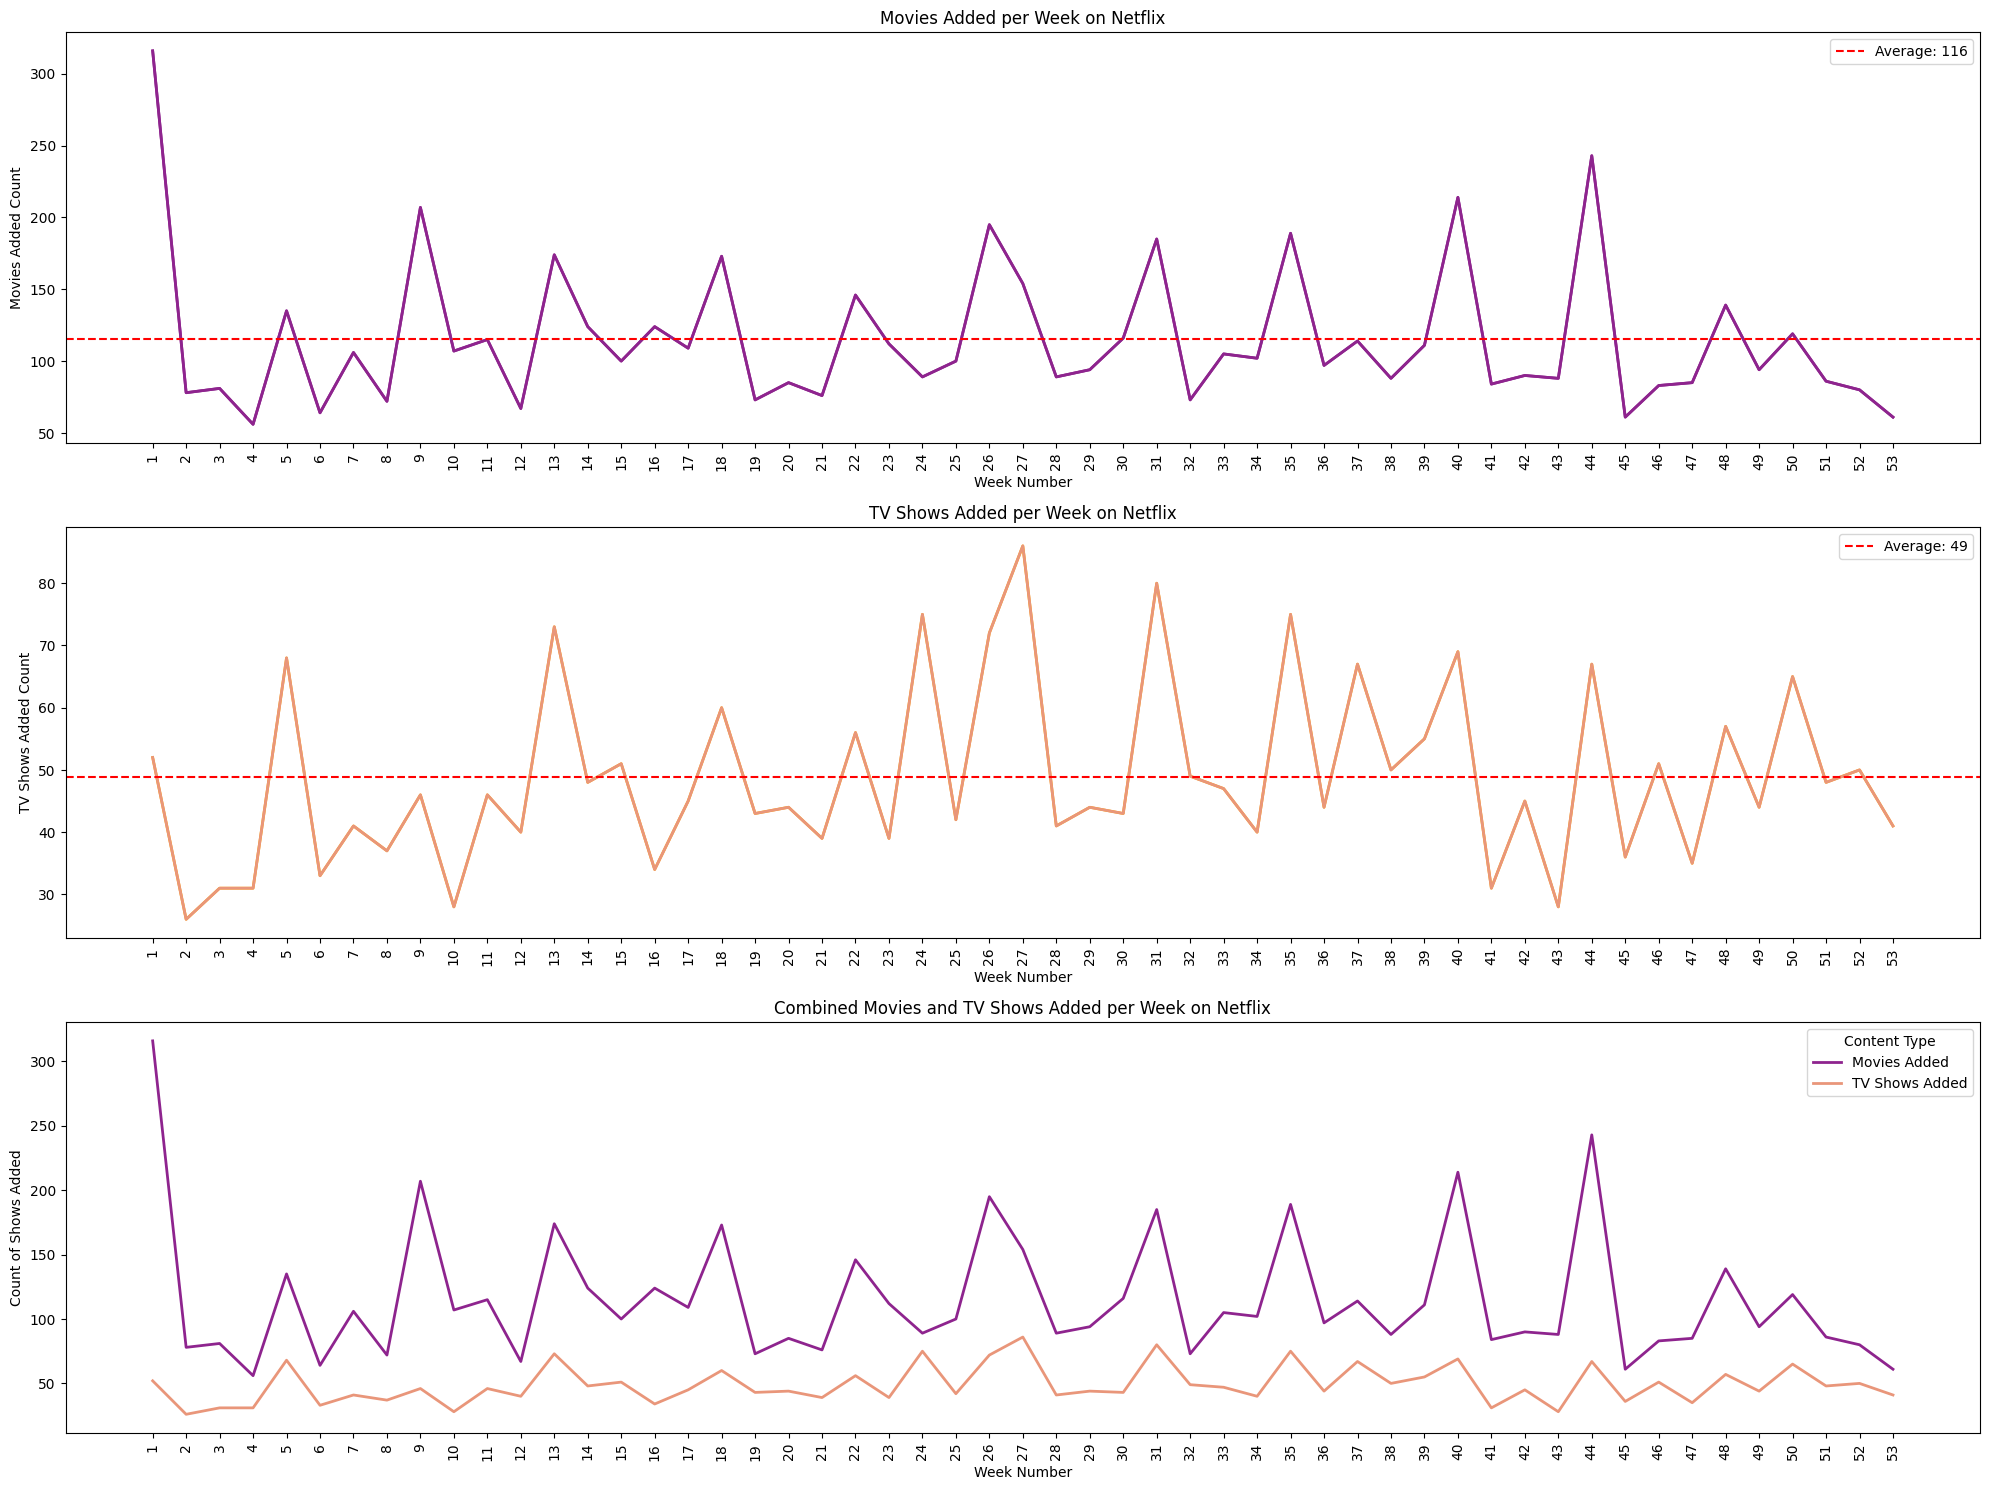

In [329]:
# Analysis of Movies added per week
movies_added_per_week = movies_copy.groupby('added_week')['title'].nunique().reset_index(name='Movies added').sort_values(by='added_week', ascending=True)
print("🎬 Top 5 weeks when Movies were added")
print(movies_added_per_week.sort_values(by='Movies added', ascending=False).head())

# Analysis of TV Shows added per week
tv_shows_added_per_week = tv_shows_copy.groupby('added_week')['title'].nunique().reset_index(name='TV Shows added').sort_values(by='added_week', ascending=True)
print("\n📺 Top 5 weeks when TV Shows were Added")
print(tv_shows_added_per_week.sort_values(by='TV Shows added', ascending=False).head())

# Create subplots to display both line charts in one row and a combined plot in the second row
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

# Ensure all week numbers are on the x-axis (assuming week numbers range from 1 to max week)
all_weeks_movies = np.arange(movies_added_per_week['added_week'].min(), movies_added_per_week['added_week'].max() + 1)
all_weeks_tvshows = np.arange(tv_shows_added_per_week['added_week'].min(), tv_shows_added_per_week['added_week'].max() + 1)

# Movie plot: Plotting the count of movies added per week as a line plot
sns.lineplot(x='added_week', y='Movies added', data=movies_added_per_week, ax=axes[0], color='#8E248E', lw=2)

# Add all missing weeks with zero movies added
movies_added_per_week_complete = pd.DataFrame({'added_week': all_weeks_movies})
movies_added_per_week_complete = movies_added_per_week_complete.merge(movies_added_per_week, on='added_week', how='left').fillna(0)

# Plot the updated data with missing weeks included
sns.lineplot(x='added_week', y='Movies added', data=movies_added_per_week_complete, ax=axes[0], color='#8E248E', lw=2)

axes[0].set_title('Movies Added per Week on Netflix')
axes[0].set_xlabel('Week Number')
axes[0].set_ylabel('Movies Added Count')
axes[0].tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for better readability

# Add average line to movie plot
avg_movies = movies_added_per_week_complete['Movies added'].mean()
axes[0].axhline(avg_movies, color='red', linestyle='--', label=f'Average: {avg_movies:.0f}')
axes[0].legend()

# TV Show plot: Plotting the count of TV shows added per week as a line plot
sns.lineplot(x='added_week', y='TV Shows added', data=tv_shows_added_per_week, ax=axes[1], color='orange', lw=2)

# Add all missing weeks with zero TV shows added
tv_shows_added_per_week_complete = pd.DataFrame({'added_week': all_weeks_tvshows})
tv_shows_added_per_week_complete = tv_shows_added_per_week_complete.merge(tv_shows_added_per_week, on='added_week', how='left').fillna(0)

# Plot the updated data with missing weeks included
sns.lineplot(x='added_week', y='TV Shows added', data=tv_shows_added_per_week_complete, ax=axes[1], color='#E9967A', lw=2)

axes[1].set_title('TV Shows Added per Week on Netflix')
axes[1].set_xlabel('Week Number')
axes[1].set_ylabel('TV Shows Added Count')
axes[1].tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for better readability

# Add average line to TV show plot
avg_tvshows = tv_shows_added_per_week_complete['TV Shows added'].mean()
axes[1].axhline(avg_tvshows, color='red', linestyle='--', label=f'Average: {avg_tvshows:.0f}')
axes[1].legend()

# Combined Line Plot: Movies and TV Shows on the same plot
sns.lineplot(data=movies_added_per_week_complete, x='added_week', y='Movies added', label='Movies Added', color='#8E248E', lw=2, ax=axes[2])
sns.lineplot(data=tv_shows_added_per_week_complete, x='added_week', y='TV Shows added', label='TV Shows Added', color='#E9967A', lw=2, ax=axes[2])

axes[2].set_title('Combined Movies and TV Shows Added per Week on Netflix')
axes[2].set_xlabel('Week Number')
axes[2].set_ylabel('Count of Shows Added')
axes[2].tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for better readability
axes[2].legend(title='Content Type')

# Adjust layout to avoid overlap
plt.tight_layout()

# Ensure all week numbers appear on the x-axis (including missing ones)
axes[0].set_xticks(all_weeks_movies)
axes[1].set_xticks(all_weeks_tvshows)
axes[2].set_xticks(np.union1d(all_weeks_movies, all_weeks_tvshows))

# Display the plots
plt.show()


Analysing the data, it would be the best to release Movies in the 1st week of the year and TV shows between 25th to
35th week of year.

Recommendations –
Implement personalized recommendation algorithms that highlight newly released movies and TV shows during
these optimal periods to enhance viewer engagement and satisfaction.


Based on month

🎬 Top 5 Months when Movies were Added
    added_month  Movies added
6           7.0           565
3           4.0           550
11         12.0           547
0           1.0           546
9          10.0           544

📺 Top 5 Months when TV Shows were Added
    added_month  TV Shows added
6           7.0             259
11         12.0             250
8           9.0             248
5           6.0             232
7           8.0             231


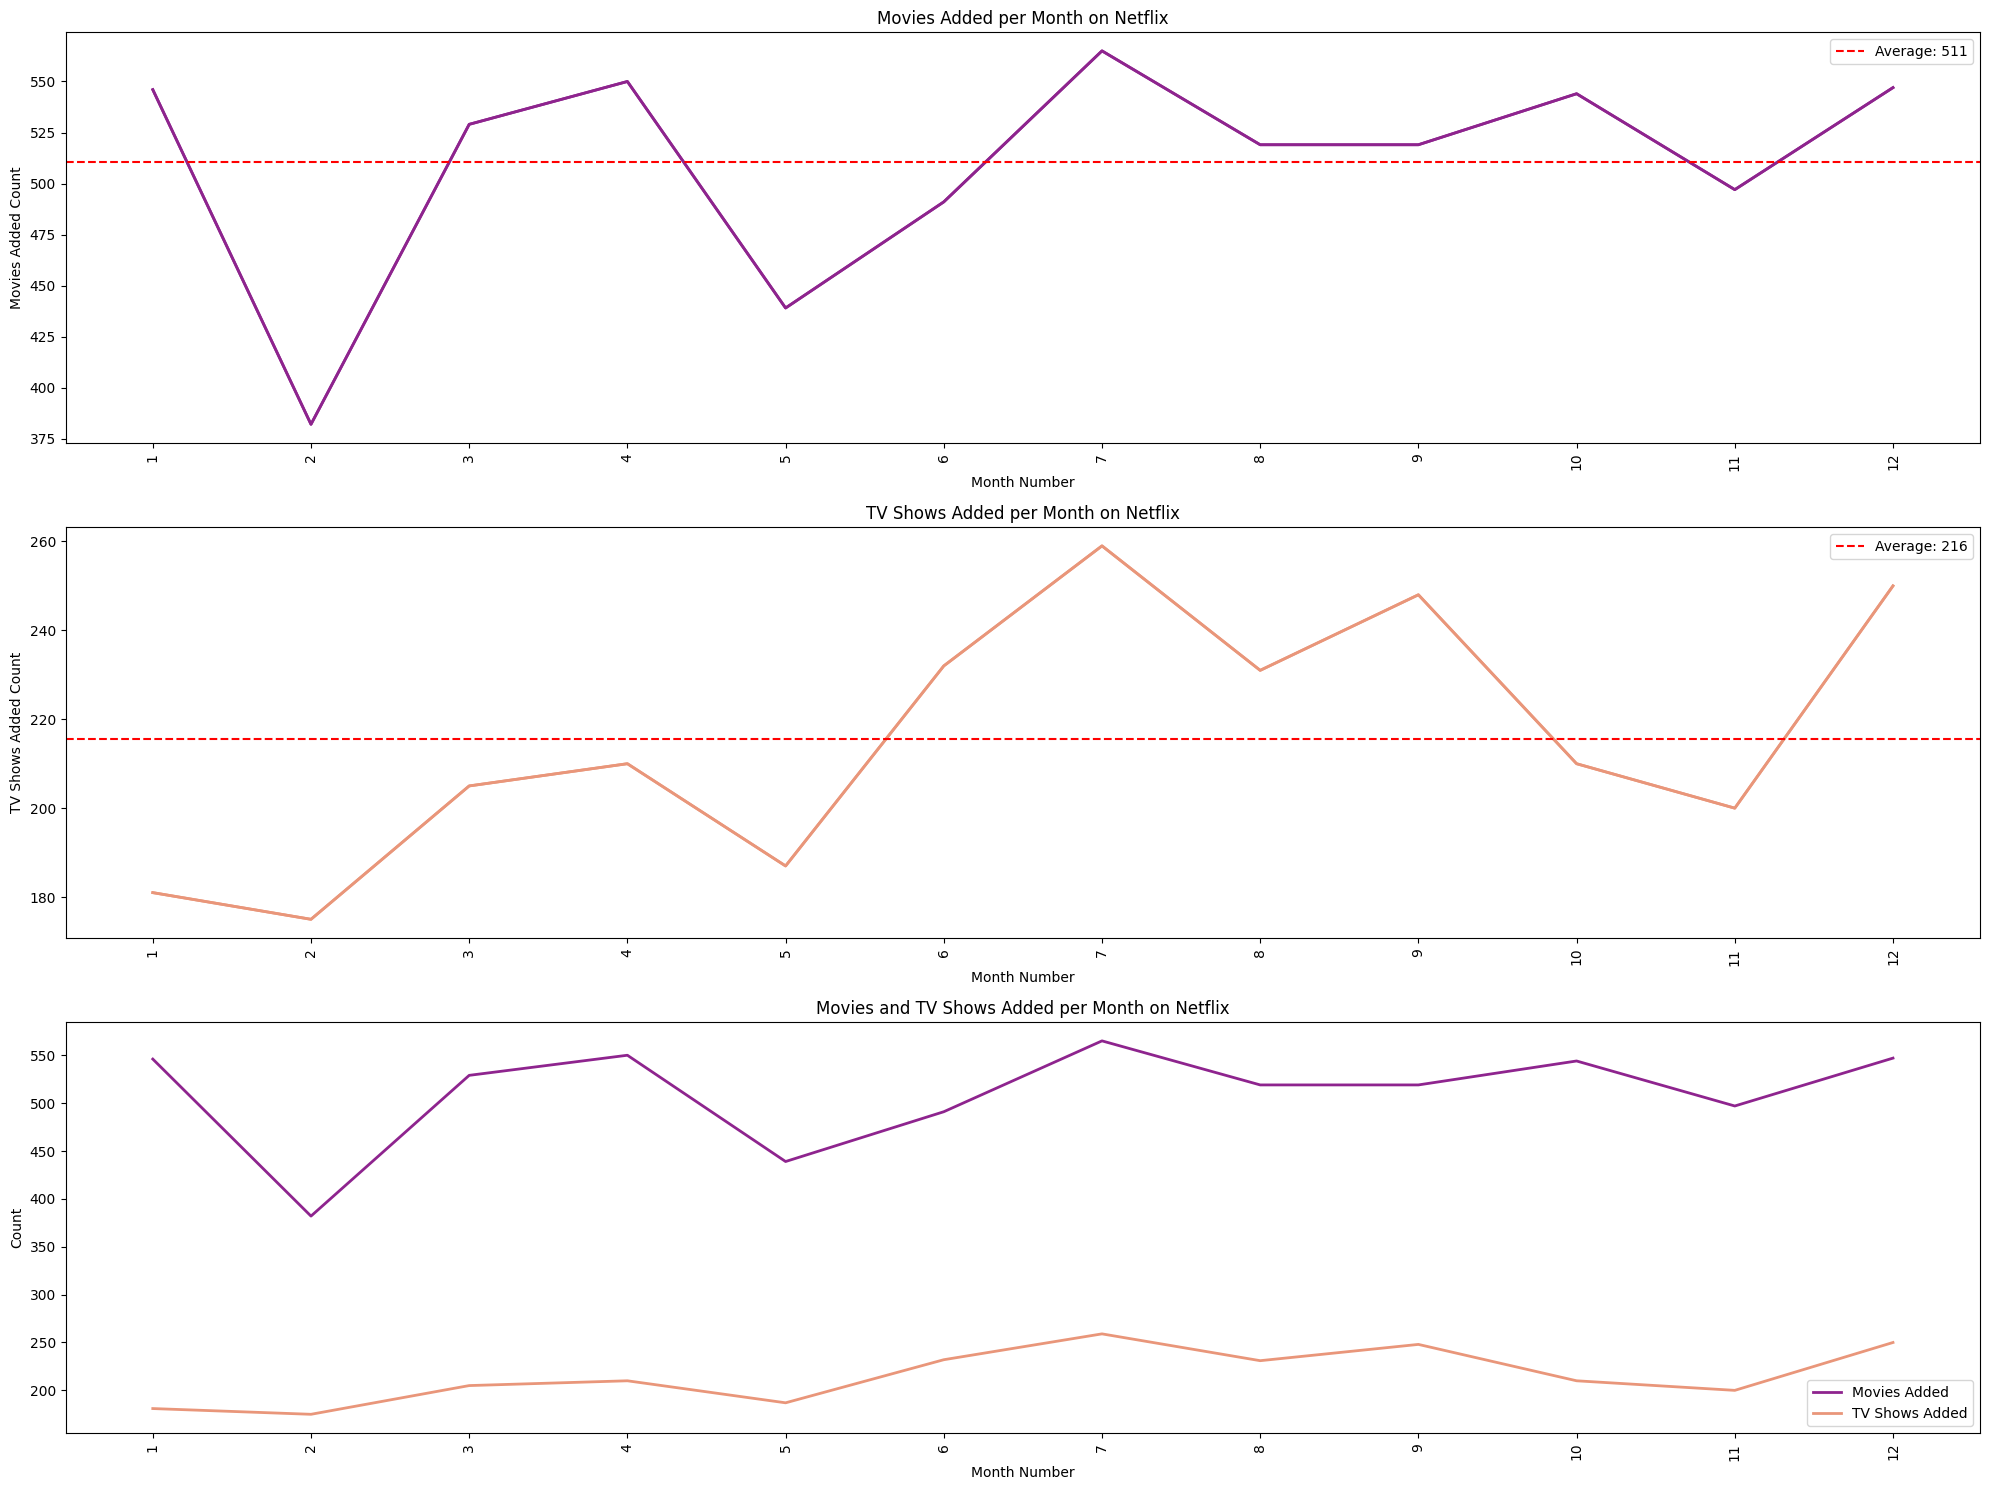

In [331]:
# Analysis of Movies added per month
movies_added_per_month = movies_copy.groupby('added_month')['title'].nunique().reset_index(name='Movies added').sort_values(by='added_month', ascending=True)
print("🎬 Top 5 Months when Movies were Added")
print(movies_added_per_month.sort_values(by='Movies added', ascending=False).head())

# Analysis of TV Shows added per month
tv_shows_added_per_month = tv_shows_copy.groupby('added_month')['title'].nunique().reset_index(name='TV Shows added').sort_values(by='added_month', ascending=True)
print("\n📺 Top 5 Months when TV Shows were Added")
print(tv_shows_added_per_month.sort_values(by='TV Shows added', ascending=False).head())

# Create subplots to display both line charts and a combined graph in one figure
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

# Ensure all month numbers are on the x-axis (assuming month numbers range from 1 to max month)
all_months_movies = np.arange(movies_added_per_month['added_month'].min(), movies_added_per_month['added_month'].max() + 1)
all_months_tvshows = np.arange(tv_shows_added_per_month['added_month'].min(), tv_shows_added_per_month['added_month'].max() + 1)

# Movie plot: Plotting the count of movies added per month as a line plot
sns.lineplot(x='added_month', y='Movies added', data=movies_added_per_month, ax=axes[0], color='#8E248E', lw=2)

# Add all missing months with zero movies added
movies_added_per_month_complete = pd.DataFrame({'added_month': all_months_movies})
movies_added_per_month_complete = movies_added_per_month_complete.merge(movies_added_per_month, on='added_month', how='left').fillna(0)

# Plot the updated data with missing months included
sns.lineplot(x='added_month', y='Movies added', data=movies_added_per_month_complete, ax=axes[0], color='#8E248E', lw=2)

axes[0].set_title('Movies Added per Month on Netflix')
axes[0].set_xlabel('Month Number')
axes[0].set_ylabel('Movies Added Count')
axes[0].tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for better readability

# Add average line to movie plot
avg_movies = movies_added_per_month_complete['Movies added'].mean()
axes[0].axhline(avg_movies, color='red', linestyle='--', label=f'Average: {avg_movies:.0f}')
axes[0].legend()

# TV Show plot: Plotting the count of TV shows added per month as a line plot
sns.lineplot(x='added_month', y='TV Shows added', data=tv_shows_added_per_month, ax=axes[1], color='#E9967A', lw=2)

# Add all missing months with zero TV shows added
tv_shows_added_per_month_complete = pd.DataFrame({'added_month': all_months_tvshows})
tv_shows_added_per_month_complete = tv_shows_added_per_month_complete.merge(tv_shows_added_per_month, on='added_month', how='left').fillna(0)

# Plot the updated data with missing months included
sns.lineplot(x='added_month', y='TV Shows added', data=tv_shows_added_per_month_complete, ax=axes[1], color='#E9967A', lw=2)

axes[1].set_title('TV Shows Added per Month on Netflix')
axes[1].set_xlabel('Month Number')
axes[1].set_ylabel('TV Shows Added Count')
axes[1].tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for better readability

# Add average line to TV show plot
avg_tvshows = tv_shows_added_per_month_complete['TV Shows added'].mean()
axes[1].axhline(avg_tvshows, color='red', linestyle='--', label=f'Average: {avg_tvshows:.0f}')
axes[1].legend()

# Third Plot: Combined graph of Movies and TV Shows Added per Month
sns.lineplot(x='added_month', y='Movies added', data=movies_added_per_month_complete, ax=axes[2], color='#8E248E', lw=2, label="Movies Added")
sns.lineplot(x='added_month', y='TV Shows added', data=tv_shows_added_per_month_complete, ax=axes[2], color='#E9967A', lw=2, label="TV Shows Added")

axes[2].set_title('Movies and TV Shows Added per Month on Netflix')
axes[2].set_xlabel('Month Number')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for better readability
axes[2].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Ensure all month numbers appear on the x-axis (including missing ones)
axes[0].set_xticks(all_months_movies)
axes[1].set_xticks(all_months_tvshows)
axes[2].set_xticks(all_months_movies)

# Display the plots
plt.show()


Insights –
The highest number of movie releases occur in July (565), followed by April (550), December (547), and January (546)
whereas the highest number of TV show releases occur in December (266), July (262), and September (251).
Recommendations –
As movies are released consistently throughout the year, indicating a steady supply of new content for viewers
regardless of the month, we need to focus on TV shows and schedule major releases for December, July, and
September to facilitate peak viewership and maximize engagement.

Insights –
The highest number of movie releases occur in July (565), followed by April (550), December (547), and January (546)
whereas the highest number of TV show releases occur in December (266), July (262), and September (251).
Recommendations –
As movies are released consistently throughout the year, indicating a steady supply of new content for viewers
regardless of the month, we need to focus on TV shows and schedule major releases for December, July, and
September to facilitate peak viewership and maximize engagement.

Although we have 475 rows having no actor name mentioned, excluding them, Anupam Kher, Shah Rukh Khan and
Naseeruddin Shah were the actors who acted in most number of movies listed in the dataset.


🎬 Top 10 Actors in Movies:
                  actor  Count of Movies acted
24444     Unknown Actor                    475
2101        Anupam Kher                     42
21765    Shah Rukh Khan                     35
17179  Naseeruddin Shah                     32
18050           Om Puri                     30
636        Akshay Kumar                     30
1310   Amitabh Bachchan                     28
12020     Julie Tejwani                     28
18315      Paresh Rawal                     28
3350        Boman Irani                     27

📺 Top 10 Actors in TV Shows:
                    actor  TV Shows acted
13892       Unknown Actor             350
13230    Takahiro Sakurai              25
14581           Yuki Kaji              19
2873          Daisuke Ono              17
251             Ai Kayano              17
6804       Junichi Suwabe              17
14565     Yuichi Nakamura              16
6761         Jun Fukuyama              15
14497    Yoshimasa Hosoya              15
3126  

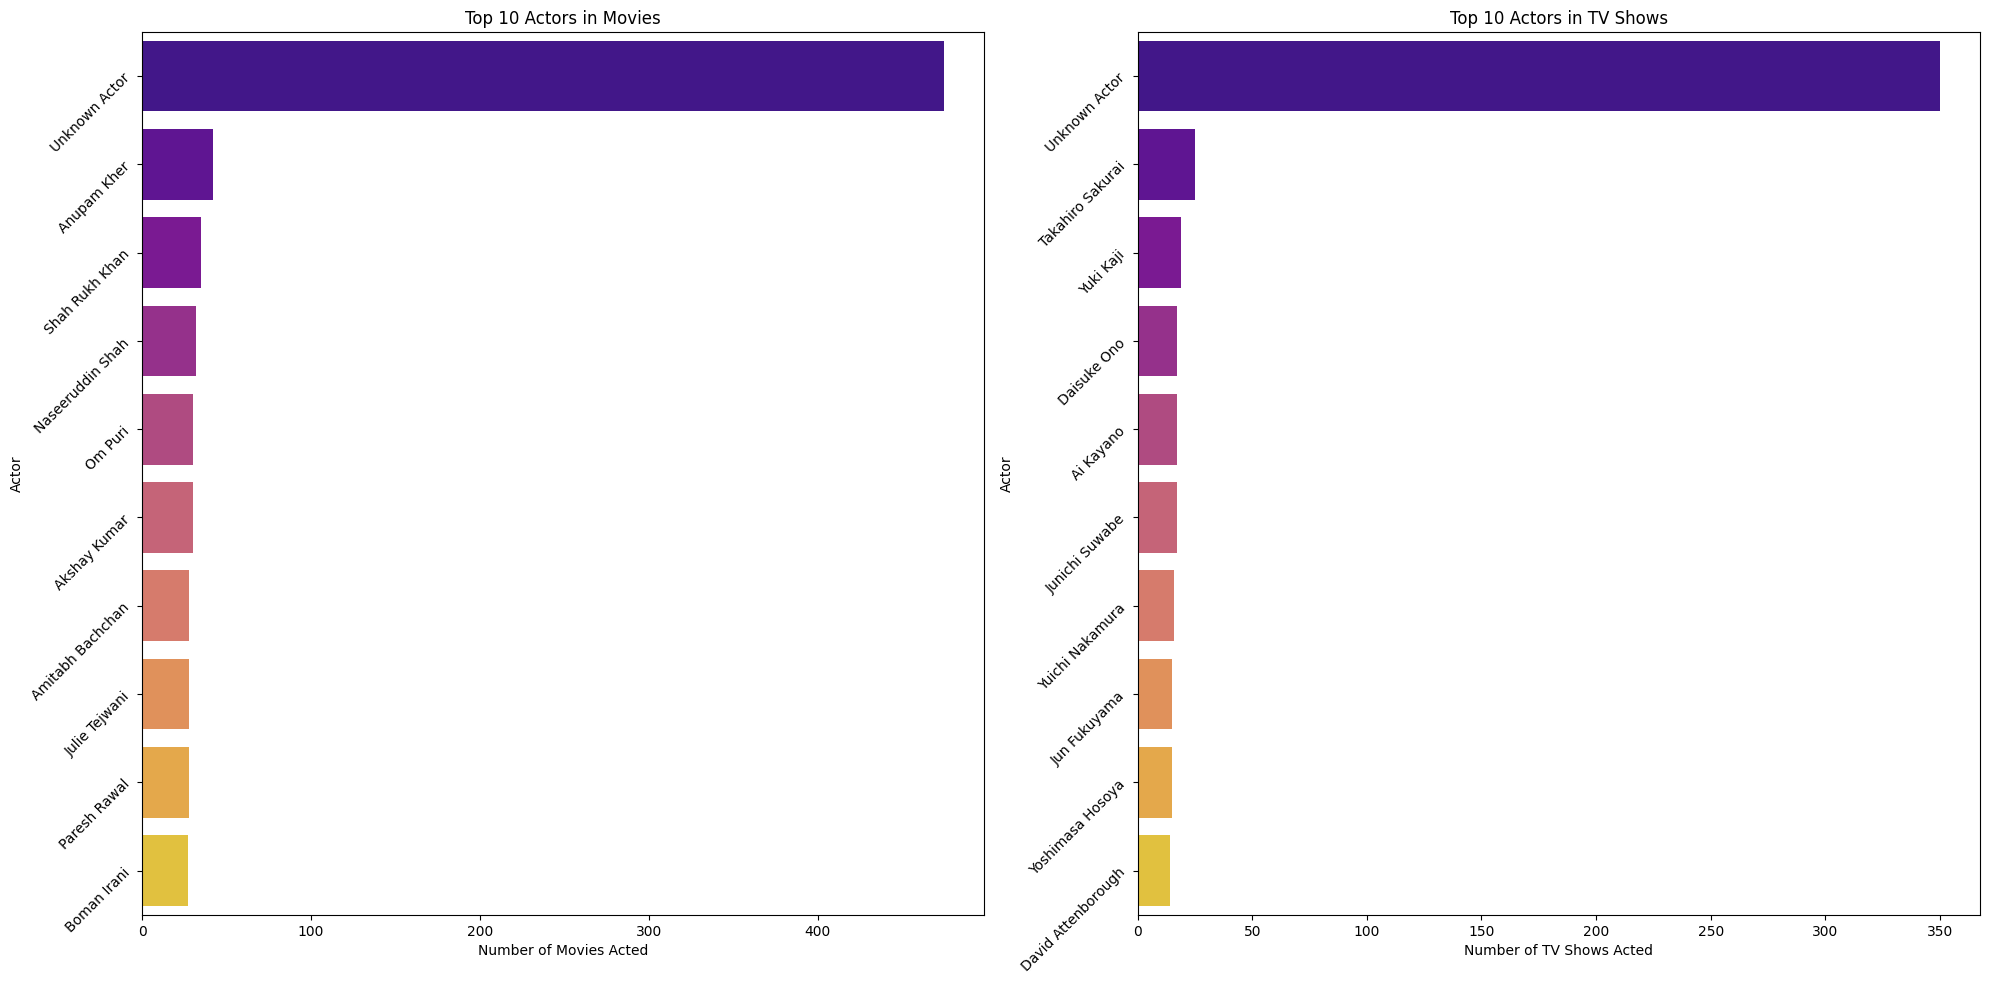

In [317]:
# Analysis of top 10 actors in Movies
top_10_movies_actors = movies.groupby('actor')['title'].nunique().reset_index(name='Count of Movies acted').sort_values(by='Count of Movies acted', ascending=False).head(10)
print("🎬 Top 10 Actors in Movies:")
print(top_10_movies_actors)

# Analysis of top 10 actors in TV Shows
top_10_tv_shows_actors = tv_shows.groupby('actor')['title'].nunique().reset_index(name='TV Shows acted').sort_values(by='TV Shows acted', ascending=False).head(10)
print("\n📺 Top 10 Actors in TV Shows:")
print(top_10_tv_shows_actors)

# Create subplots to display both bar charts in one row
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Movie plot: Plotting the top 10 actors with the highest count of movies acted in
sns.barplot(x='Count of Movies acted', y='actor', data=top_10_movies_actors, ax=axes[0], palette='plasma')
axes[0].set_title('Top 10 Actors in Movies')
axes[0].set_xlabel('Number of Movies Acted')
axes[0].set_ylabel('Actor')
axes[0].tick_params(axis='y', rotation=45)  # Rotate the y-axis labels for better readability

# TV Show plot: Plotting the top 10 actors with the highest count of TV shows acted in
sns.barplot(x='TV Shows acted', y='actor', data=top_10_tv_shows_actors, ax=axes[1], palette='plasma')
axes[1].set_title('Top 10 Actors in TV Shows')
axes[1].set_xlabel('Number of TV Shows Acted')
axes[1].set_ylabel('Actor')
axes[1].tick_params(axis='y', rotation=45)  # Rotate the y-axis labels for better readability

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()


Insights –
Excluding the unknown actor rows, Takahiro Sakurai acted in most number of TV Shows.
Recommendations –
1. Producing movies or shows having actors as Anupam kher, Shah Rukh Khan & Takahiro Sakurai could help in
increased watch time along with the time spent on platform as people are watching more of these actors.
2. Utilize social media and collaborate with influencers to promote movies directed by the top 10 directors, engaging
with their online fan communities

### Top 10 directors

🎬 Top 10 Directors in Movies:
                 director  No_of_movies_directed
4536     Unknown Director                    188
3579        Rajiv Chilaka                     22
1817            Jan Suter                     21
3630          Raúl Campos                     19
4258          Suhas Kadav                     16
2737         Marcus Raboy                     15
1862            Jay Karas                     15
727   Cathy Garcia-Molina                     13
4723      Youssef Chahine                     12
2813      Martin Scorsese                     12

📺 Top 10 Directors in TV Shows:
                  director  No_of_tvshows_directed
284       Unknown Director                    2446
146              Ken Burns                       3
8      Alastair Fothergill                       3
259            Stan Lathan                       2
100            Hsu Fu-chun                       2
84   Gautham Vasudev Menon                       2
251            Shin Won-ho               

<ipython-input-167-2a6c1bcdb3a1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='No_of_movies_directed', y='director', data=movies_director_count, ax=axes[0], palette='Blues_d')
<ipython-input-167-2a6c1bcdb3a1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='No_of_tvshows_directed', y='director', data=tv_shows_director_count, ax=axes[1], palette='Greens_d')


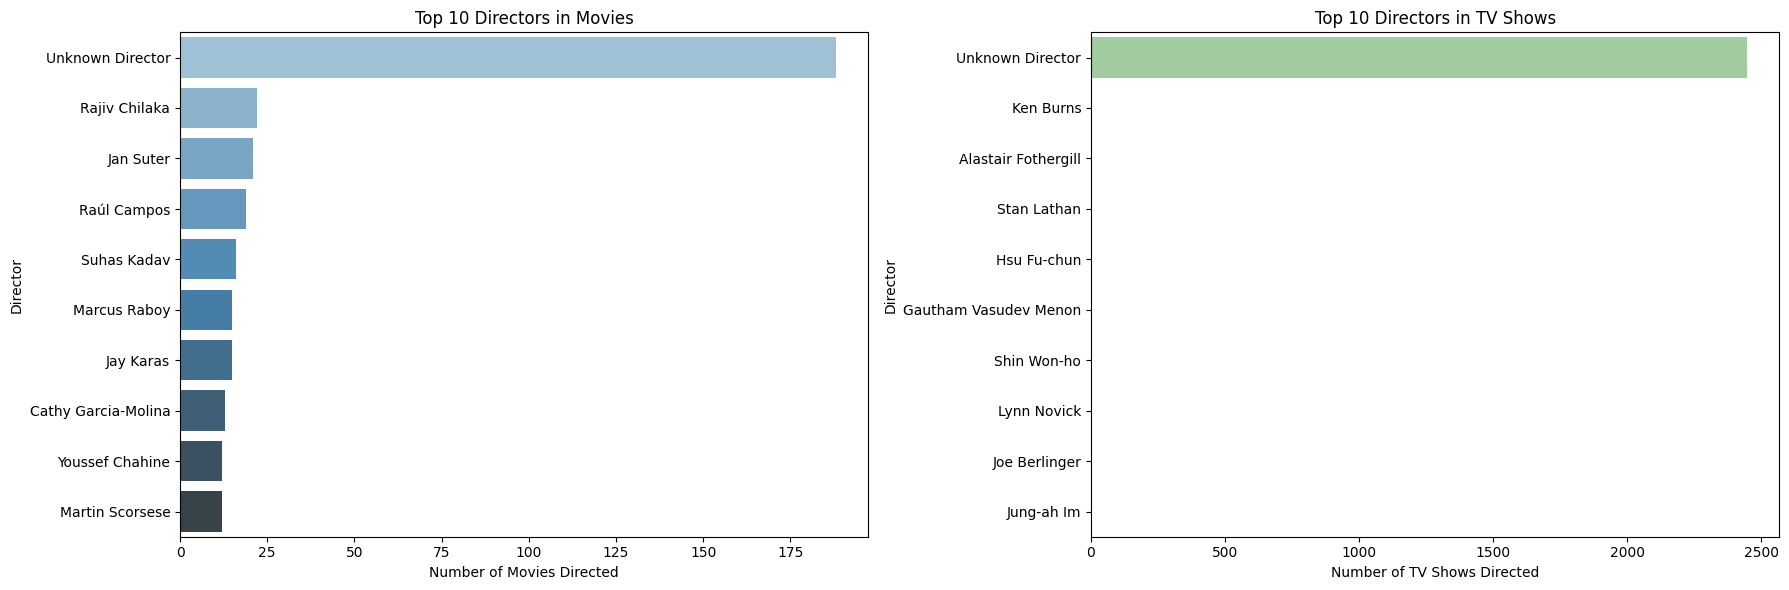

In [167]:
# Group by director and count unique titles for movies
movies_director_count = movies.groupby('director')['title'].nunique().reset_index(name='No_of_movies_directed').sort_values(by='No_of_movies_directed', ascending=False).head(10)

# Group by director and count unique titles for TV shows
tv_shows_director_count = tv_shows.groupby('director')['title'].nunique().reset_index(name='No_of_tvshows_directed').sort_values(by='No_of_tvshows_directed', ascending=False).head(10)

# Display the descriptive statistics for both data frames
print("🎬 Top 10 Directors in Movies:")
print(movies_director_count)

print("\n📺 Top 10 Directors in TV Shows:")
print(tv_shows_director_count)

# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot horizontal bar chart for movies director count
sns.barplot(x='No_of_movies_directed', y='director', data=movies_director_count, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Directors in Movies')
axes[0].set_xlabel('Number of Movies Directed')
axes[0].set_ylabel('Director')

# Plot horizontal bar chart for TV shows director count
sns.barplot(x='No_of_tvshows_directed', y='director', data=tv_shows_director_count, ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 10 Directors in TV Shows')
axes[1].set_xlabel('Number of TV Shows Directed')
axes[1].set_ylabel('Director')

# Display the plots
plt.tight_layout()
plt.show()



In [144]:
# Fill null values for 'added_year' with 0
null_years = df_copy['added_year'].isnull()
df_copy['added_year'] = df_copy['added_year'].fillna(0)

# Fill null values for 'date_added' with 0
null_dates = df_copy['date_added'].isnull()
df_copy['date_added'] = df_copy['date_added'].fillna(0)

# Convert 'release_year' to datetime (first day of each year) and make it tz-naive
df_copy['release_year'] = pd.to_datetime(df_copy['release_year'].astype(str) + '-01-01').dt.tz_localize(None)

# Calculate the time difference in days between 'date_added' and 'release_year'
df_copy['time_to_release'] = (df_copy['date_added'] - df_copy['release_year']).dt.days

mode_of_days_to_release = df_copy['time_to_release'].mode()
mode_of_days_to_release

<ipython-input-144-ac352d6f2c86>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['release_year'] = pd.to_datetime(df_copy['release_year'].astype(str) + '-01-01').dt.tz_localize(None)


,time_to_release
0,546


Insights –
Ken Burns is the director of most number of shows.
Recommendations –
Develop dedicated sections or collections for each of the top 10 directors, allowing viewers to explore their
filmography in one place.


Recommendations –
Prioritize adding high-demand and popular movies to Netflix within the shortest possible time frame to keep viewers
engaged and satisfied.


### Analyzing Rating

🎬 Top 5 Movie Ratings:
  rating  count
8  TV-MA   2061
6  TV-14   1426
5      R    796
9  TV-PG    540
4  PG-13    490

📺 Top 5 TV Show Ratings:
  rating  count
4  TV-MA   1145
2  TV-14    733
5  TV-PG    323
7  TV-Y7    195
6   TV-Y    176


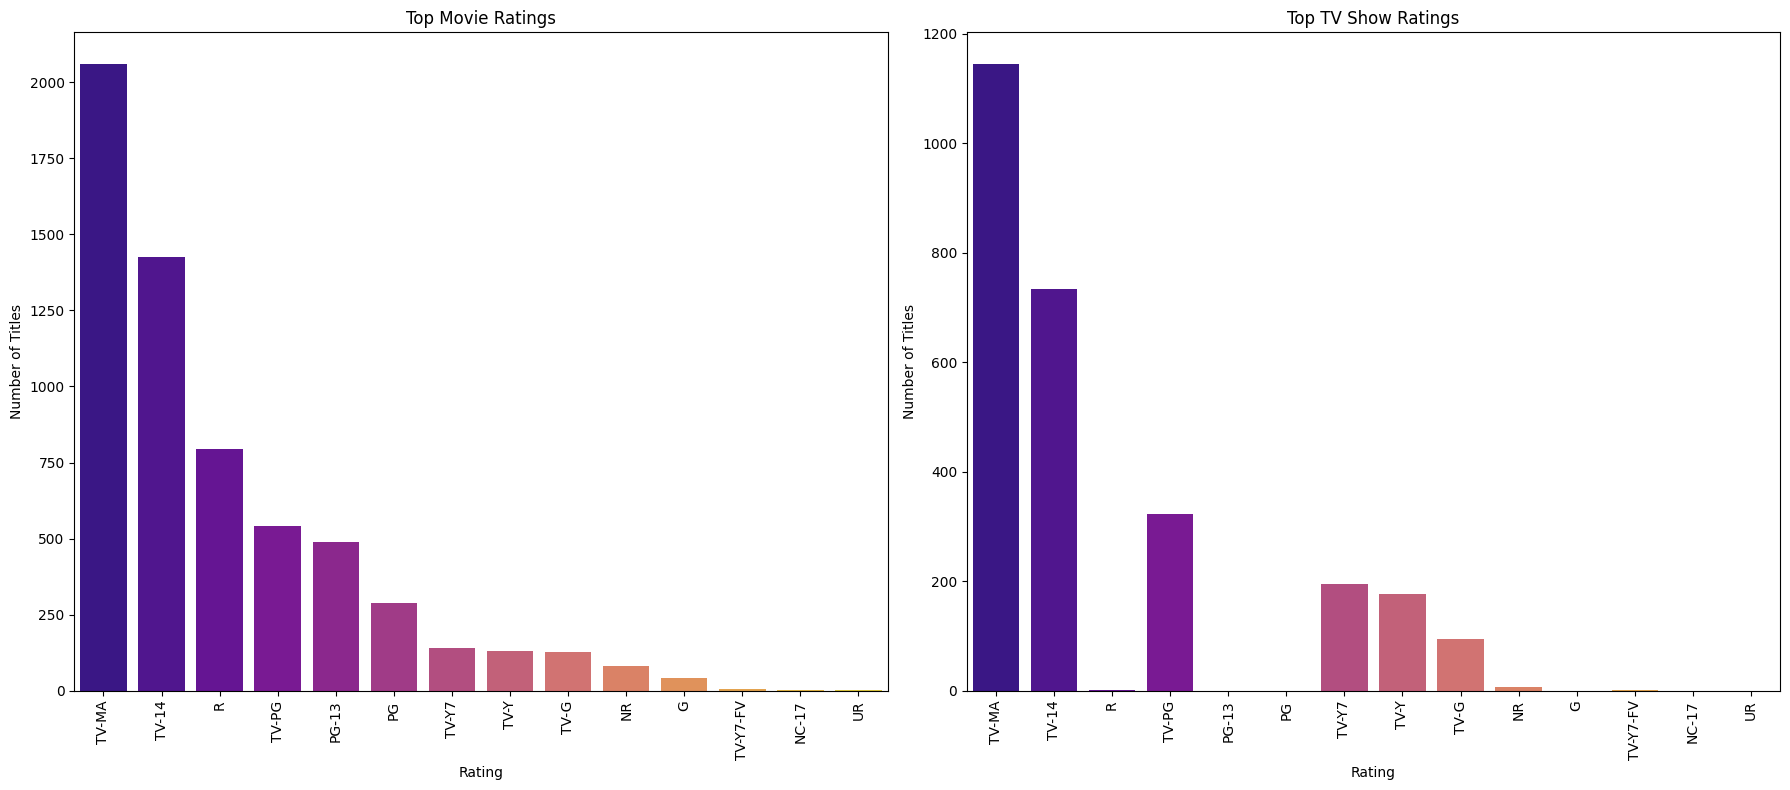

In [318]:
# Grouping and counting unique titles by rating for movies
movies_rating_count = movies.groupby(['rating'])['title'].nunique().reset_index(name='count').sort_values(by='count', ascending=False)

# Grouping and counting unique titles by rating for TV shows
tv_shows_rating_count = tv_shows.groupby(['rating'])['title'].nunique().reset_index(name='count').sort_values(by='count', ascending=False)

# Get the combined unique ratings from both datasets
combined_ratings = pd.concat([movies_rating_count['rating'], tv_shows_rating_count['rating']]).unique()

# Display Top 5 Ratings Tables
print("🎬 Top 5 Movie Ratings:")
print(movies_rating_count.head())

print("\n📺 Top 5 TV Show Ratings:")
print(tv_shows_rating_count.head())

# Create subplots to display both plots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Movie Rating Plot (sorted in descending order of count)
sns.barplot(x='rating', y='count', data=movies_rating_count, ax=axes[0], palette='plasma', order=combined_ratings)
axes[0].set_title('Top Movie Ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of Titles')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

# TV Show Rating Plot (sorted in descending order of count)
sns.barplot(x='rating', y='count', data=tv_shows_rating_count, ax=axes[1], palette='plasma', order=combined_ratings)
axes[1].set_title('Top TV Show Ratings')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Number of Titles')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()


Insights –
The majority of shows in our dataset are rated TV-MA, indicating a significant focus on adult-oriented content for
both Movies & TV Shows.
Recommendations –
Develop or acquire more G and PG-rated Movie content to expand offerings for children and family-friendly viewing.

###Analyzing Duration

In [147]:
df['duration'].value_counts()

,count
duration,
1 Season,35035
2 Seasons,9559
3 Seasons,5084
94 min,4343
106 min,4040
...,...
3 min,4
5 min,3
8 min,2


As the duration is present both in min we observe min is provided for movies and season is provided for series.
To move further we will have to split the duration data separate for movies and series.
once that is done we will analyze both and give our result.

In [148]:
# Separate Movies and TV Shows
movies= df[df['duration'].str.contains('min', na=False)].copy()  # Movies contain 'min'
tv_shows = df[df['duration'].str.contains('Season', na=False)].copy()  # TV Shows contain 'Season'

# Remove ' min' and convert to integer for movie duration (cleaning step)
movies['duration_min'] = movies['duration'].str.replace(' min', '').astype(int)

# Extract number of seasons for TV Shows
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(int)


🎬 Movie Duration Statistics:
count    145677.000000
mean        106.857369
std          24.708681
min           3.000000
25%          93.000000
50%         104.000000
75%         119.000000
max         312.000000
Name: duration_min, dtype: float64
📺 TV Show Seasons Statistics:
count    56148.000000
mean         1.928101
std          1.811729
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         17.000000
Name: seasons, dtype: float64


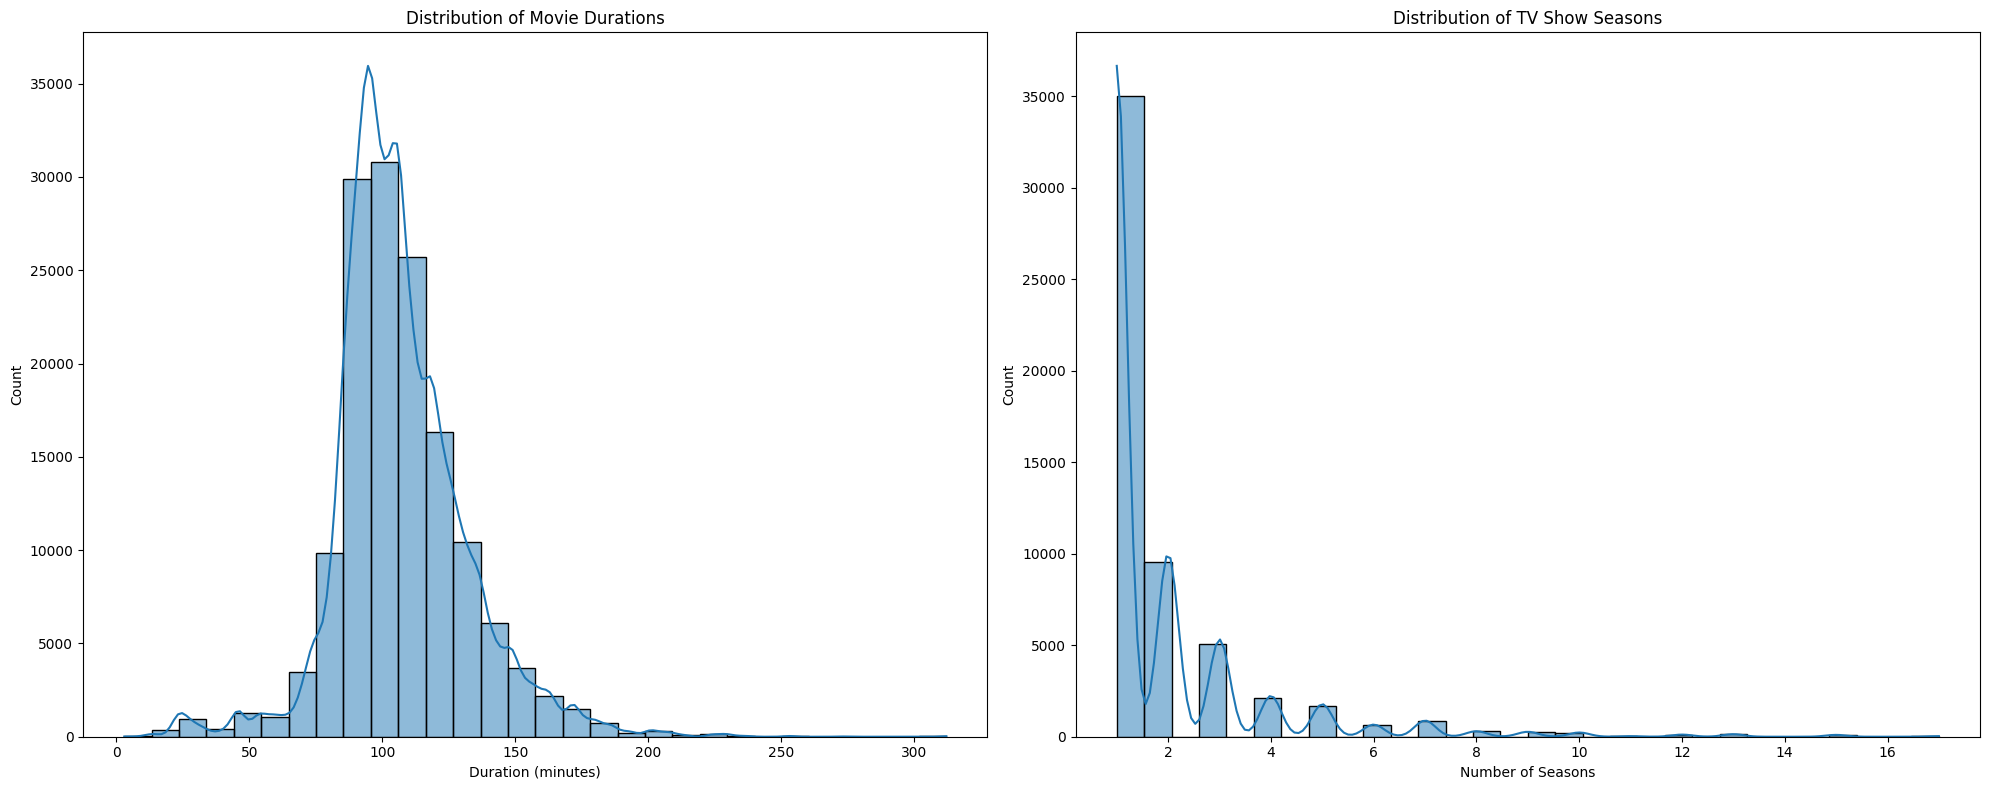

In [154]:
# Movie duration statistics
movie_duration_stats = movies['duration_min'].describe()

# TV Show Season statistics
tv_show_seasons_stats = tv_shows['seasons'].describe()

# Create subplots to display both histograms in one row
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Movie Duration Plot
sns.histplot(movies['duration_min'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Movie Durations")
axes[0].set_xlabel("Duration (minutes)")
axes[0].set_ylabel("Count")

# TV Show Seasons Plot
sns.histplot(tv_shows['seasons'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of TV Show Seasons")
axes[1].set_xlabel("Number of Seasons")
axes[1].set_ylabel("Count")

# Display the statistics
print("🎬 Movie Duration Statistics:")
print(movie_duration_stats)

print("📺 TV Show Seasons Statistics:")
print(tv_show_seasons_stats)

# Show the plots
plt.tight_layout()
plt.show()


In [160]:
# Calculate average duration for Movies and TV Shows
average_movie_duration = movies['duration_min'].mean()
average_tv_show_seasons = tv_shows['seasons'].mean()

print(f"🎬 Average Movie Duration: {average_movie_duration} minutes")
print(f"📺 Average TV Show Seasons: {average_tv_show_seasons} seasons")



🎬 Average Movie Duration: 106.85736938569575 minutes
📺 Average TV Show Seasons: 1.9281007337750231 seasons


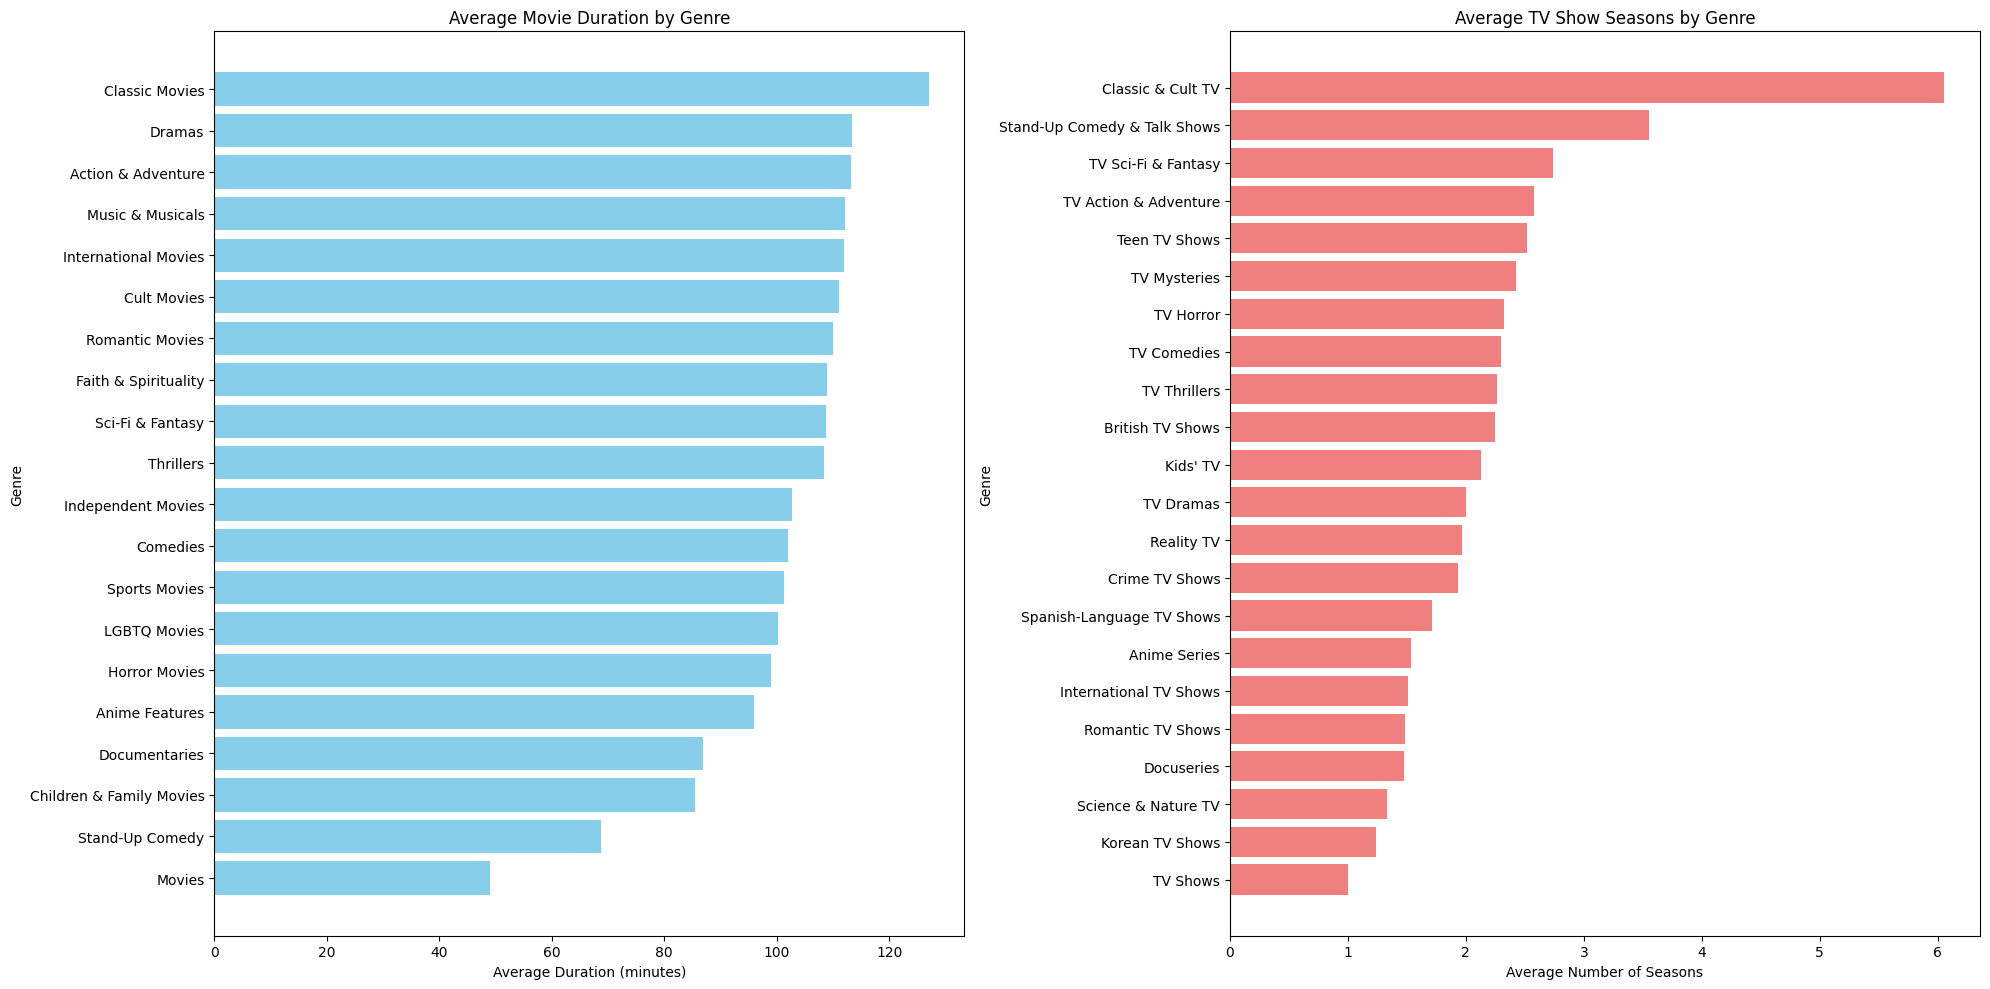

In [159]:
# Genre wise distribution of Average duration Movies and TV shows
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Average duration by genre for Movies, sorted in increasing order
movie_genre_avg_duration = movies.groupby('genre')['duration_min'].mean().sort_values(ascending=True)
ax[0].barh(movie_genre_avg_duration.index, movie_genre_avg_duration.values, color='skyblue')
ax[0].set_title('Average Movie Duration by Genre')
ax[0].set_xlabel('Average Duration (minutes)')
ax[0].set_ylabel('Genre')

# Average number of seasons by genre for TV Shows, sorted in increasing order
tv_show_genre_avg_seasons = tv_shows.groupby('genre')['seasons'].mean().sort_values(ascending=True)
ax[1].barh(tv_show_genre_avg_seasons.index, tv_show_genre_avg_seasons.values, color='lightcoral')
ax[1].set_title('Average TV Show Seasons by Genre')
ax[1].set_xlabel('Average Number of Seasons')
ax[1].set_ylabel('Genre')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


 **Interpretation - Average Movie Duration by Genre (Left Chart)**

- **Classic Movies**: This genre has the **highest average movie duration**, significantly longer than other genres. This suggests that classic films tend to be longer on average.
- **Dramas**: Dramas also have a relatively **high average duration**, indicating that they tend to be longer films.
- **Action & Adventure, Music & Musicals, International Movies, Cult Movies, Romantic Movies, Faith & Spirituality, Sci-Fi & Fantasy, Thrillers**: These genres have a **moderate average duration**

----

 **Interpretation - Average TV Show Seasons by Genre (Right Chart)**

- **Classic & Cult TV**: This genre has the **highest average number of seasons**. This could indicate that classic or cult TV shows tend to have longer runs or are revived for multiple seasons.
- **Stand-Up Comedy & Talk Shows, TV Sci-Fi & Fantasy, TV Action & Adventure, Teen TV Shows, TV Mysteries, TV Horror, TV Comedies, TV Thrillers, British TV Shows, Kids' TV, TV Dramas, Reality TV, Crime TV Shows, Spanish-Language TV Shows, Anime Series, International TV Shows, Romantic TV Shows, Documentaries, Science & Nature TV, Korean TV Shows**: These genres have a **moderate average number of seasons**, falling within a similar range.
- **TV Shows (Overall)**: This category, representing the average for all TV shows, has the **lowest average number of seasons**.

**Insights**: This chart shows that **classic** and **cult TV shows** tend to have longer runs, while other genres have a more moderate average number of seasons. The average for all TV shows is relatively low, suggesting a prevalence of **shorter-run series**.

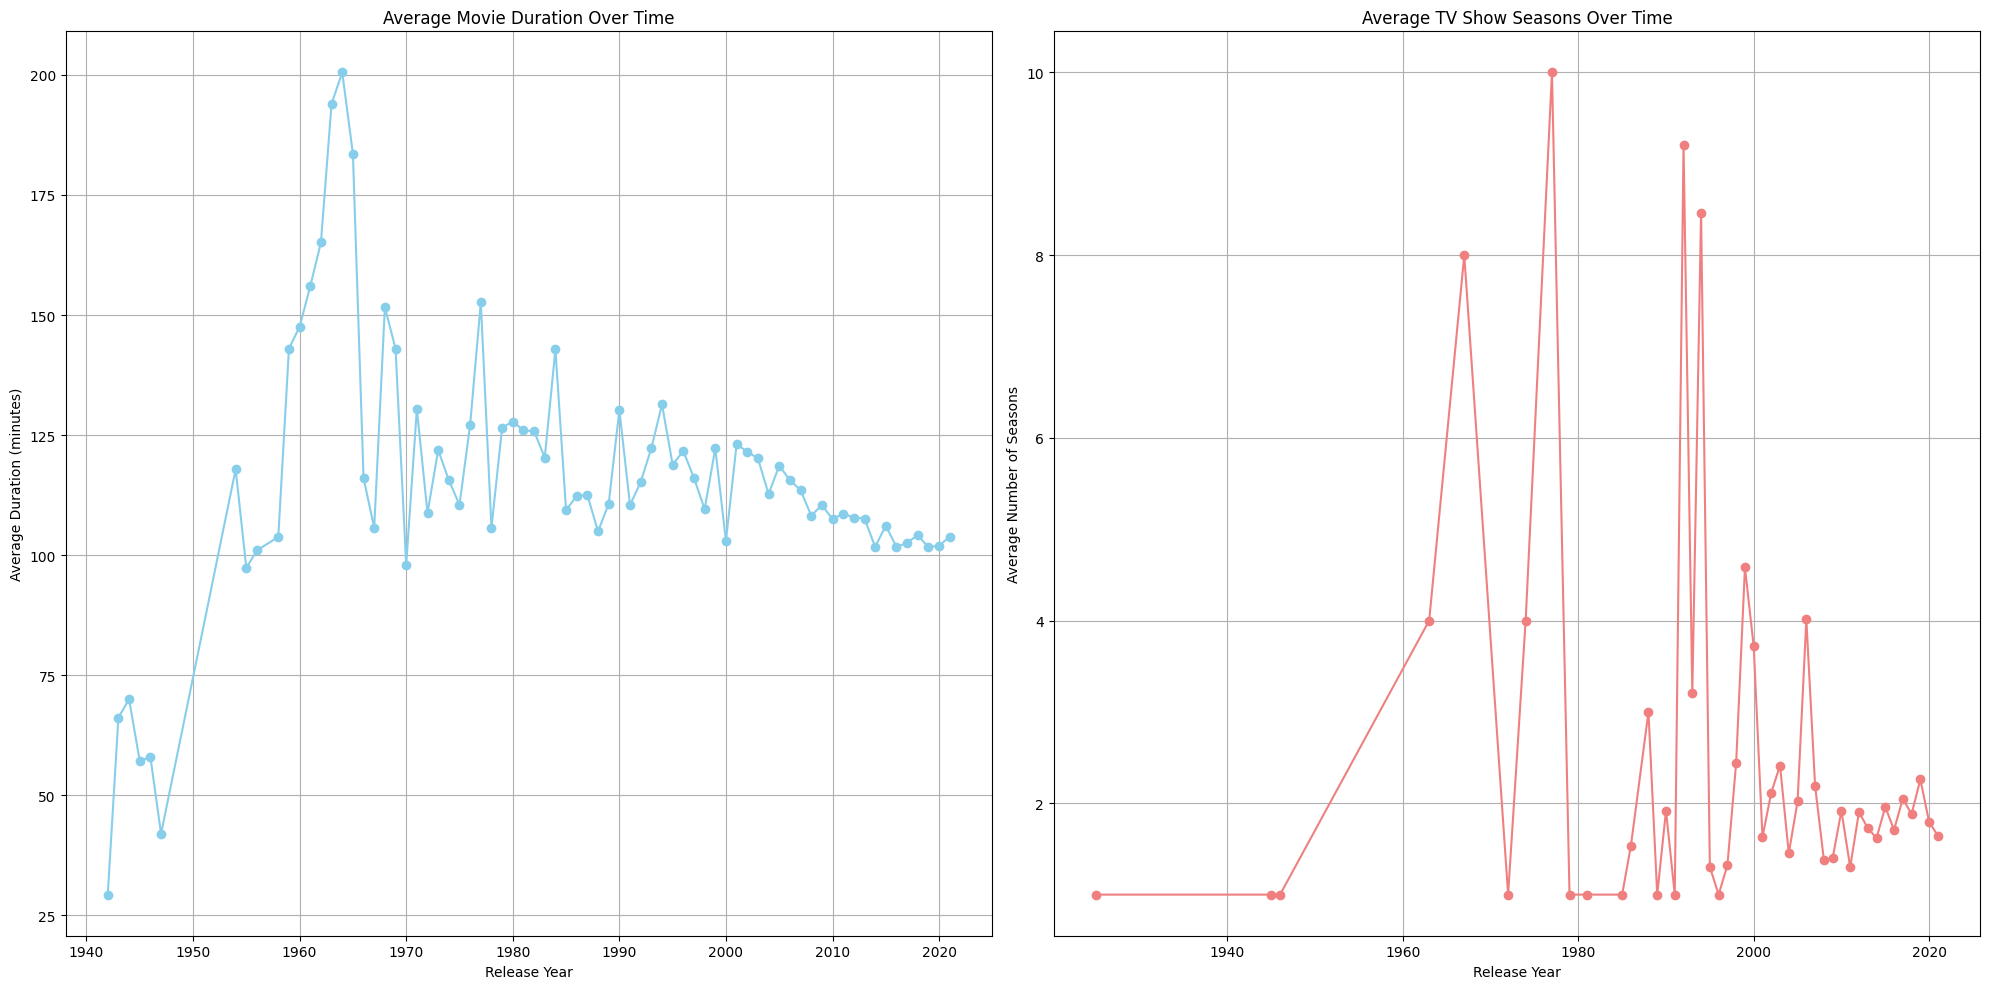

In [161]:
# Average movie duration over the years
avg_movie_duration_by_year = movies.groupby('release_year')['duration_min'].mean()

# Average number of seasons over the years
avg_tv_show_seasons_by_year = tv_shows.groupby('release_year')['seasons'].mean()

# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot Average Movie Duration Over Time
ax[0].plot(avg_movie_duration_by_year.index, avg_movie_duration_by_year.values, color='skyblue', marker='o')
ax[0].set_title('Average Movie Duration Over Time')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Average Duration (minutes)')
ax[0].grid(True)

# Plot Average TV Show Seasons Over Time
ax[1].plot(avg_tv_show_seasons_by_year.index, avg_tv_show_seasons_by_year.values, color='lightcoral', marker='o')
ax[1].set_title('Average TV Show Seasons Over Time')
ax[1].set_xlabel('Release Year')
ax[1].set_ylabel('Average Number of Seasons')
ax[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
